

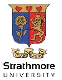

*   **Name: Rosemary Kanyoro**
*   **Admission Number: 149765**
*   **Unit: DSA 8502_Predictive and Optimization Analytics**


---




 **Project Title:**

 **A MACHINE LEARNING APPROACH TO PREDICTION OF KENYA'S GROSS DOMESTIC PRODUCT (GDP): ANALYSING GEO-ECONOMIC DEVELOPMENT FACTORS**


---



 **-> Introduction**

GDP per capita is an important economic metric used globally by economists to analyse a country's prosperity based on its economic growth by measuring how much of a country's overall economic production value can be attributed to each of its citizens.

My project attempts to investigate the various factors that affect GDP per capita for different countries and apply a machine learning algorithm to develop a model that can accurately predict the GDP. The proposed model is built on a dataset of different countries and their corresponding GDP per capita values containing the geo-economic development factors, which will be trained and validated on a separate dataset to estimate the next GDP per capita for Kenya.

---


 **-> Objectives**

I seek to answer the following questions:

1.   What factors are most strongly correlated with the GDP per capita of a country?
2.   Which countries have the highest and lowest GDP per capita and are the same factors influential in both groups?
3. Can a machine learning algorithm be trained on the various factors and then accurately predict GDP per capita for any given country?
4. Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa
5. Can I use the model to build a GDP predictor for Kenya from the insights gained about the Sub-Saharan Africa region?


---
 **-> Dataset**

The dataset was sourced from the World Factbook hosted by U.S Central Intelligence Agency (CIA) webiste. It contains the GDP per Capita data of 227 countries categorised in 11 different regions. Data Source: https://www.cia.gov/the-world-factbook/

---
 **-> Assumptions**


1.   It is assumed that the GDP per Capita data sourced from the World Factbook hosted by the U.S. Central Intelligence Agency (CIA) website is accurate and reliable
2.   Geo-economic factors are assumed to have a meaningful relationship with a country's economic prosperity and are significant contributors to GDP variations.
3. It is assumed that regions marked in the dataset share commonalities in terms of economic, social, and geographic characteristics that may influence GDP per capita.





---
 **-> Motivation**

Majority of development experts use GDP per capita in the analysis of economic growth. The project allows me to apply both my finance and economics background to interrogate the data for a topic that is crucial for economic development by highlighting the most important factors affecting the GDP per capita and how the insights can be applied to predictions for Kenya to steer conversations and draw attention to the most critical factors for GDP growth.


---









#  **Importing Libraries**

I begin by importing all the libraries I will use for all the code I will use in the notebook

In [86]:
#Include libraries to be used
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import numpy as np
import pydotplus
import ssl
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import statsmodels
import io
import missingno as mn
import statsmodels.api as sm
import warnings
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

#  **Section 1) Loading and inspecting the data**

In [87]:
#reading the data and correcting the comma separators to be decimals
ssl._create_default_https_context = ssl._create_unverified_context
df=pd.read_csv('https://raw.githubusercontent.com/RoseWairimuK/Datasets-/main/countries%20of%20the%20world.csv',decimal=",")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [88]:
#checking the rows and columns to confirm the 227 countries
df.shape

(227, 20)

In [89]:
#inspecting the data
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,103.014858,213.869858,393.285377
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,129.336104,178.849522,288.185737
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.210000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.415000,0.395000,0.795000
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,54.000000,231.000000,475.500000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,163.500000,312.000000,619.750000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,769.000000,906.000000,954.000000


**Section 1 observations summary:**

---



*   The data contains a total of 20 columns: 19 columns show the various factors and one column is the GDP per capita.
*   The summary statistics of the numerical columns confirm the expected variations because this is data for a variety of countries.
*   The count row implies there are missing values in some of the columns and this will be investigated in the next section. The column titles are also not ideal and will need to be harmonised.


---



#  **Section 2) Data Cleaning**

With such a large dataset it is imperative to understand the initial state of the data, identify the issues that may affect my data modelling and correct these issues. The next section covers this.









## **2.1) Identifying problems**










In [90]:
#viewing the columns.
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [91]:
#renaming columns for ease of referencing and graphics
df.rename(columns={'Area (sq. mi.)': 'Area_Sq_m', 'Coastline (coast/area ratio)': 'Coastline_coast_area_ratio','Infant mortality (per 1000 births)': 'Infant_mortality_per_1000_births','GDP ($ per capita)': 'GDP_$_per_capita','Phones (per 1000)': 'Phones_per_1000','Pop. Density (per sq. mi.)': 'Pop. Density_per_sq_m','Literacy (%)': 'Literacy_%','Arable (%)': 'Arable_%', 'Crops (%)': 'Crops_%', 'Other (%)': 'Other_%'}, inplace=True)
df.columns

Index(['Country', 'Region', 'Population', 'Area_Sq_m', 'Pop. Density_per_sq_m',
       'Coastline_coast_area_ratio', 'Net migration',
       'Infant_mortality_per_1000_births', 'GDP_$_per_capita', 'Literacy_%',
       'Phones_per_1000', 'Arable_%', 'Crops_%', 'Other_%', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

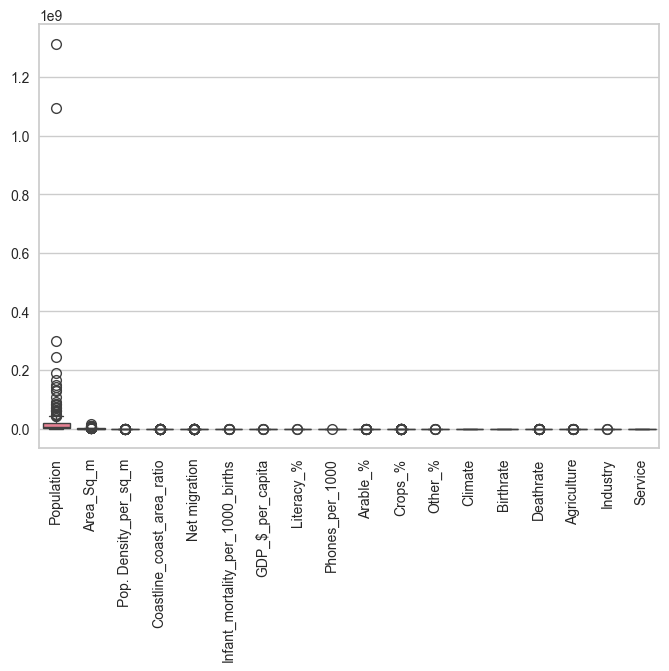

In [92]:
#checking for outliers. None, except for variations in the population per country as expected.
sns.boxplot(data = df)
plt.xticks(rotation=90);

In [93]:
#visualising the data types. No further action needed
df.dtypes

Country                              object
Region                               object
Population                            int64
Area_Sq_m                             int64
Pop. Density_per_sq_m               float64
Coastline_coast_area_ratio          float64
Net migration                       float64
Infant_mortality_per_1000_births    float64
GDP_$_per_capita                    float64
Literacy_%                          float64
Phones_per_1000                     float64
Arable_%                            float64
Crops_%                             float64
Other_%                             float64
Climate                             float64
Birthrate                           float64
Deathrate                           float64
Agriculture                         float64
Industry                            float64
Service                             float64
dtype: object

In [94]:
#checking nill values in the data set. Out of the 20 clumns 14 have nill values
df.isnull().any()

Country                             False
Region                              False
Population                          False
Area_Sq_m                           False
Pop. Density_per_sq_m               False
Coastline_coast_area_ratio          False
Net migration                        True
Infant_mortality_per_1000_births     True
GDP_$_per_capita                     True
Literacy_%                           True
Phones_per_1000                      True
Arable_%                             True
Crops_%                              True
Other_%                              True
Climate                              True
Birthrate                            True
Deathrate                            True
Agriculture                          True
Industry                             True
Service                              True
dtype: bool

In [95]:
# Function to apply background gradient
def background_gradient(val):
    if isinstance(val, (int, float)):
        color = 'background-color: lightblue' if val > 0 else ''
        return color
    return ''

# Create DataFrame with NA count and percentage
NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
                       for i in (df.isna().sum()/df.shape[0]*100).tolist()]],
                       columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

# Apply background gradient using the custom function
styled_df = NA.style.applymap(background_gradient, subset=['NA Count'])

# Display styled DataFrame
styled_df

,NA Count,NA Percent
Country,0,0.00%
Region,0,0.00%
Population,0,0.00%
Area_Sq_m,0,0.00%
Pop. Density_per_sq_m,0,0.00%
Coastline_coast_area_ratio,0,0.00%
Net migration,3,1.32%
Infant_mortality_per_1000_births,3,1.32%
GDP_$_per_capita,1,0.44%
Literacy_%,18,7.93%


<AxesSubplot:>

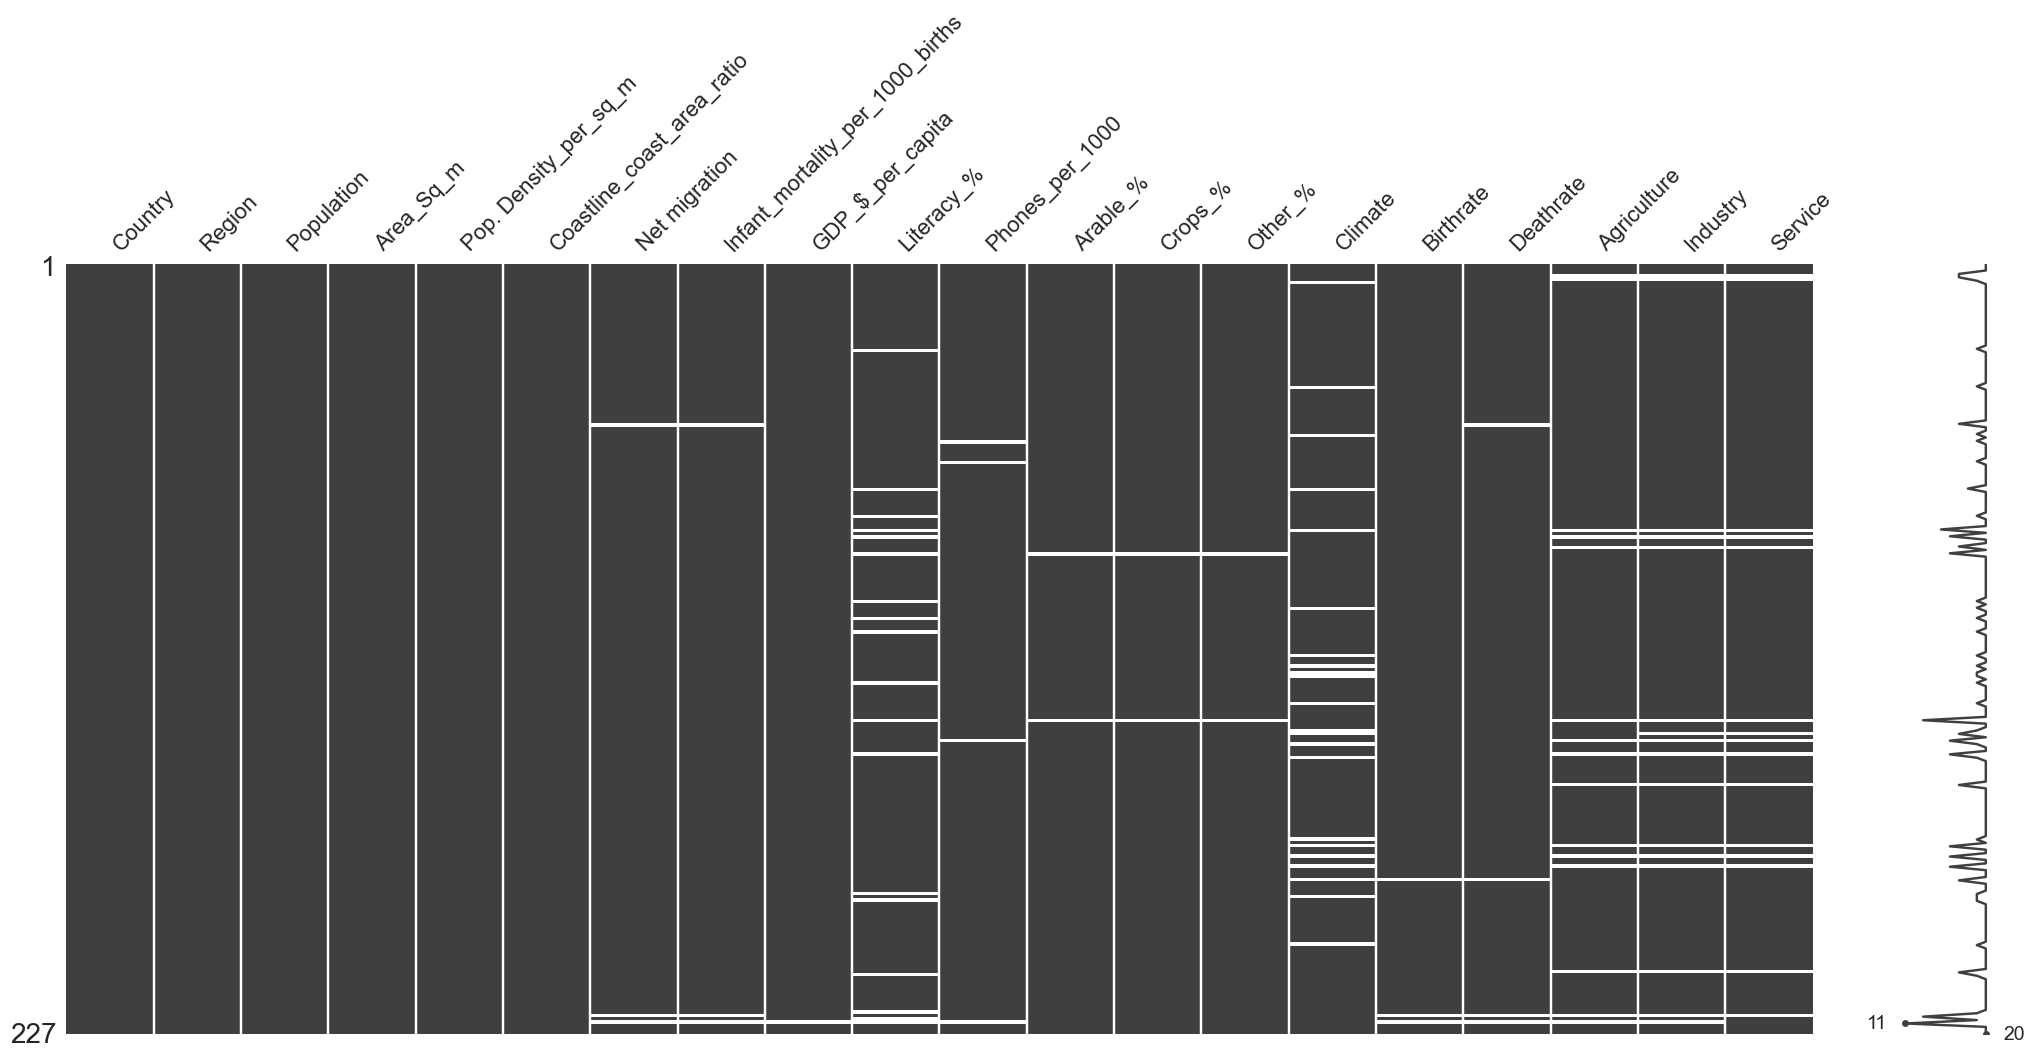

In [96]:
#visualising the nulls
mn.matrix(df)

##  **2.2) Filling the missing values**

1.   Countries that are close geologically are often similar in many ways and hence in the next section I proceed to fill in the null values using the median of the specific region that a country belongs to.  
2.   For categorical features like climate, I use the mode instead of median to maintain the consistency in the ratings. For instance, the climate variable in the dataset is ranked from 1-4 hence the mode maintains this rating.










In [97]:
#grouping by region to inspect the medians.
df.groupby('Region')[['GDP_$_per_capita','Literacy_%','Agriculture']].median()

,GDP_$_per_capita,Literacy_%,Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,92.00
BALTICS,11400.0,99.80,0.04
C.W. OF IND. STATES,3450.0,99.05,198.00
EASTERN EUROPE,9100.0,98.60,65.00
LATIN AMER. & CARIB,6300.0,94.05,35.00
NEAR EAST,9250.0,83.00,26.50
NORTHERN AFRICA,6000.0,70.00,132.00
NORTHERN AMERICA,29800.0,97.50,0.01
OCEANIA,5000.0,95.00,75.50


-> For more clarity on the countries found in the regions that are not commonly known:




*   Near East - Bahrain, Cyprus, Gaza, Iraq, Israel, Jordan, Kuwait, Lebanon, Oman, Qatar, Saudi, Syria, Turkey, UAE, West Bank and Yemen.
*   Baltics - Estonia, Latvia and Lithuania
*   C.W. OF Ind States (Commonwealth of Independent States) - Armenia, Azerbaijan,Belarus, Georgia, Kazakhstan, Kyrgyzstan, Moldova, Russia, Tajikistan, Turmenistan, Ukraine and Uzbekistan






In [98]:
#filling the missing values
warnings.filterwarnings('ignore')
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        fill_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        fill_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = fill_values[region]

In [99]:
#confirming there are no missing values
df.isnull().any()

Country                             False
Region                              False
Population                          False
Area_Sq_m                           False
Pop. Density_per_sq_m               False
Coastline_coast_area_ratio          False
Net migration                       False
Infant_mortality_per_1000_births    False
GDP_$_per_capita                    False
Literacy_%                          False
Phones_per_1000                     False
Arable_%                            False
Crops_%                             False
Other_%                             False
Climate                             False
Birthrate                           False
Deathrate                           False
Agriculture                         False
Industry                            False
Service                             False
dtype: bool

<AxesSubplot:>

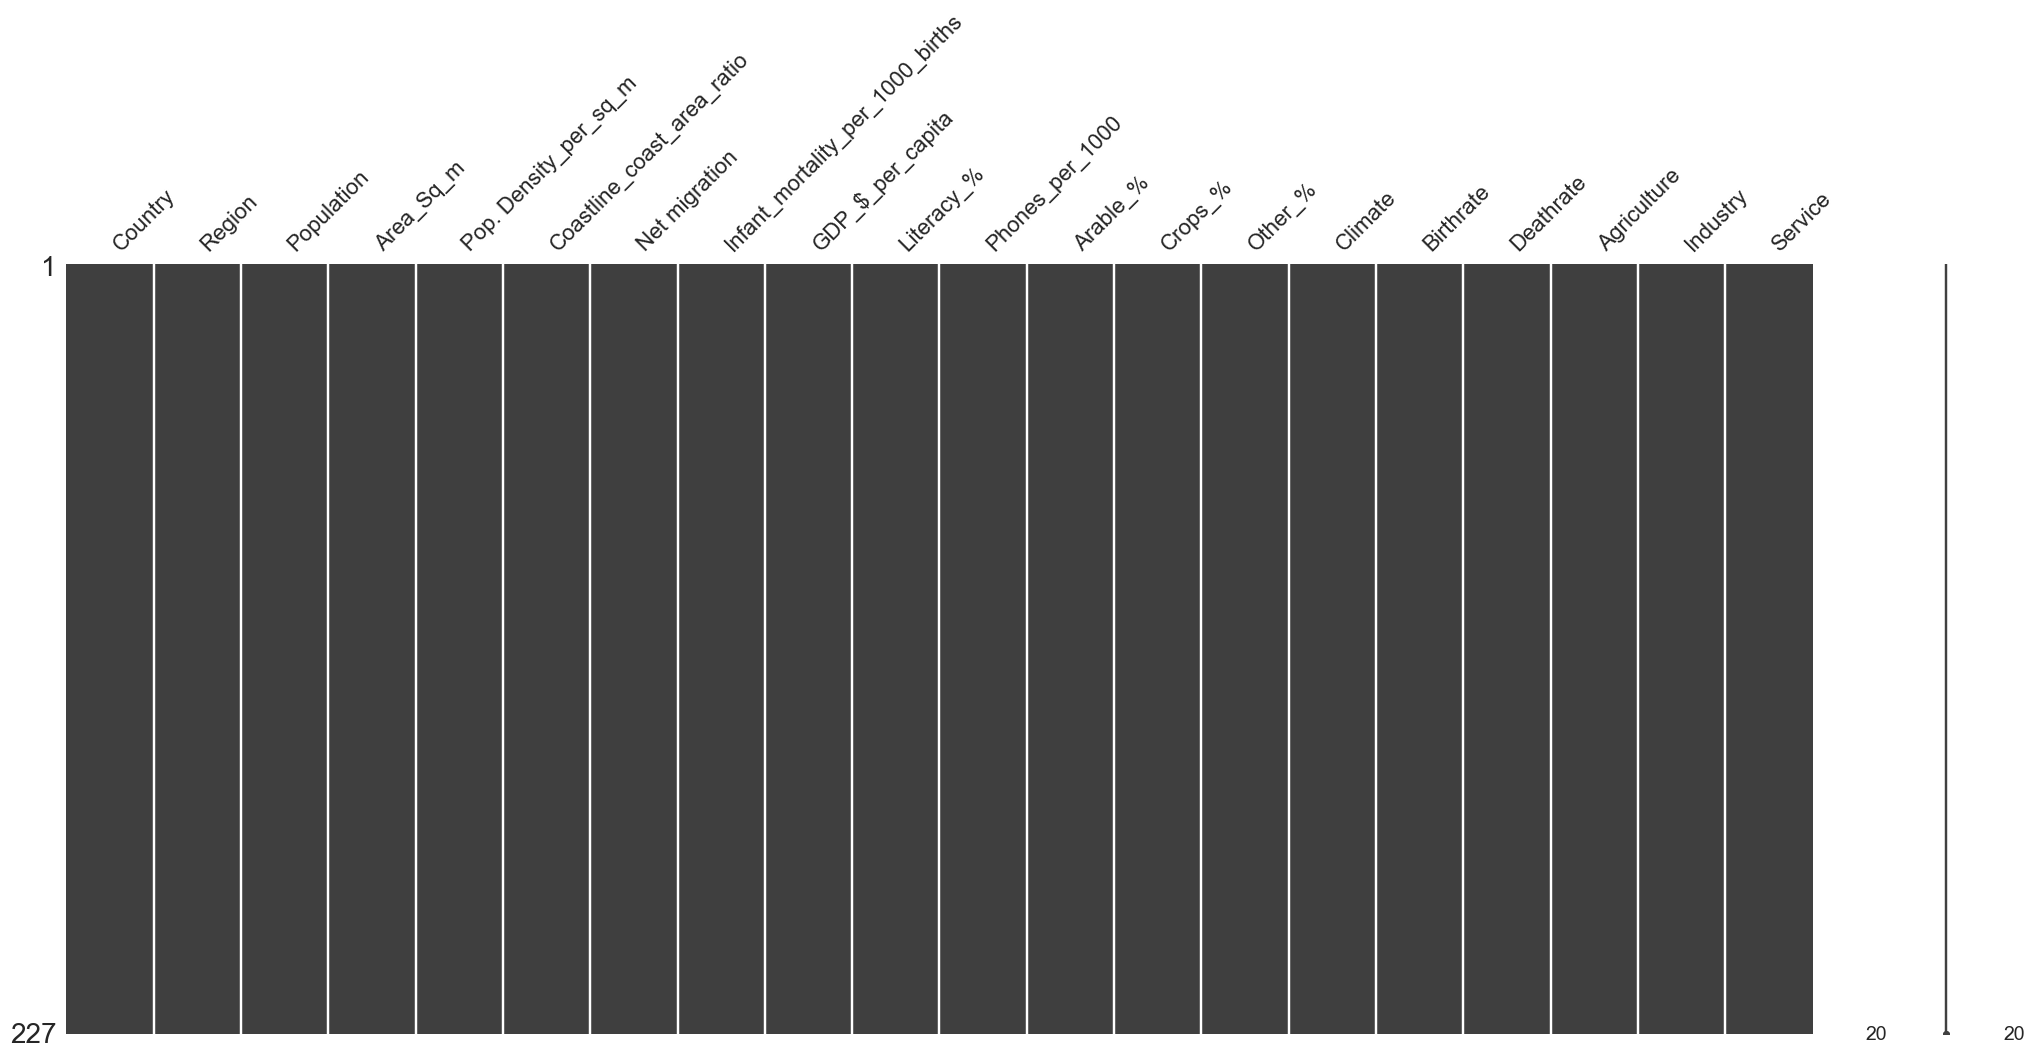

In [100]:
#visual confirming the clean data
mn.matrix(df)

**Section 2 observations summary:**

---

In preparation for data modelling the identified data issues have now been resolved as follows:

*   Column titles have been renamed for clarity as well as ease of referencing in code.
*   Missing values have been filled using the median and mode that aligns with the respective regions countries belong to.
*  After inspecting the outliers identified, these were only evident in the population column as different countries have varying populations. There were not eliminated so as to maintain the accuracy and integrity of the underlying assumptions.


---



#  **Section 3) Data Exploration**

The next sections explore the data to answer two questions from my objectives:


1.   **Which countries have the highest and lowest GDP per Capita and are the same factors influencial in both groups?**

2. **What factors are most strongly correlated with the GDP per capita of a country?**

##  **3.1) Regions and Countries with the highest and lowest GDP per capita**


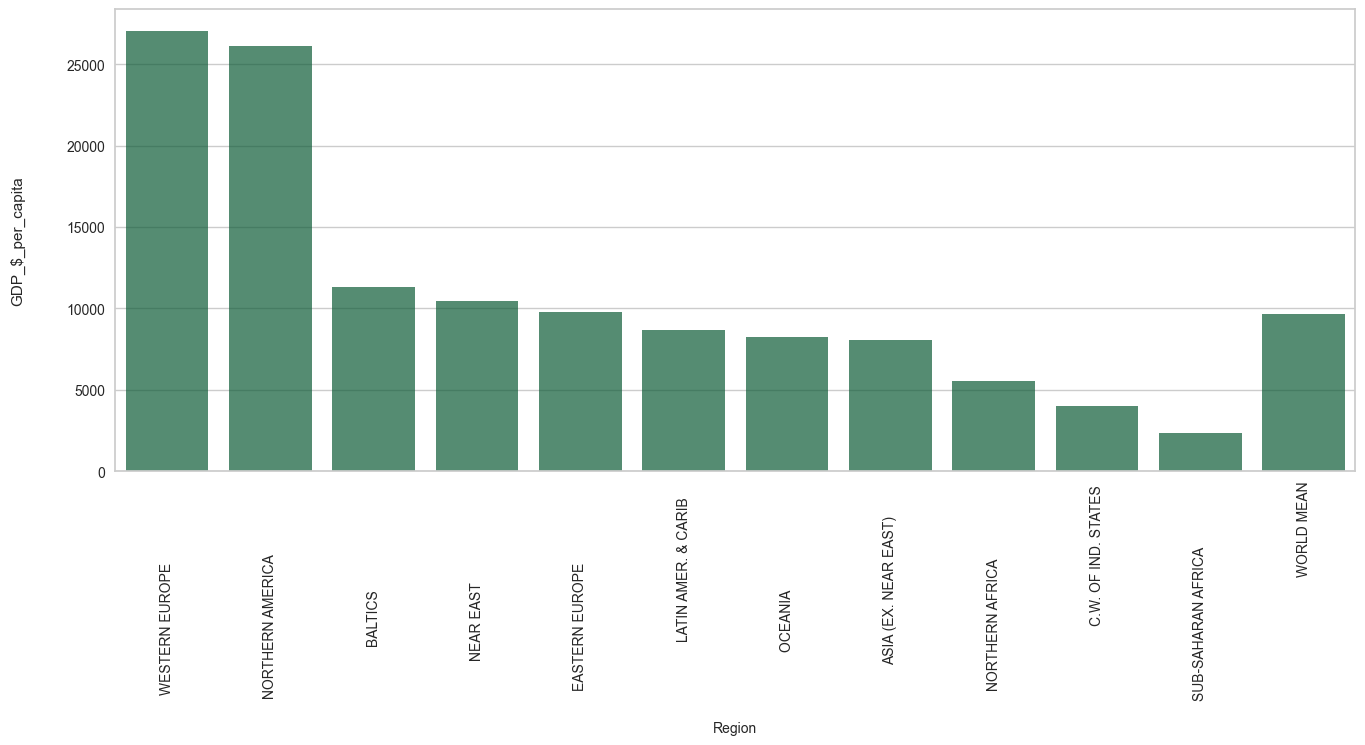

In [101]:
#ranking the regions
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_regions = df.groupby('Region')['GDP_$_per_capita'].mean().sort_values(ascending=False).reset_index().head(25)
mean = pd.DataFrame({'Region':['WORLD MEAN'], 'GDP_$_per_capita':[df['GDP_$_per_capita'].mean()]})
gdps = pd.concat([top_gdp_regions[['Region','GDP_$_per_capita']],mean],ignore_index=True)

sns.barplot(data = gdps, x='Region', y='GDP_$_per_capita', alpha=0.7, color='#006838')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(10)
plt.xticks(rotation=90)
plt.show()



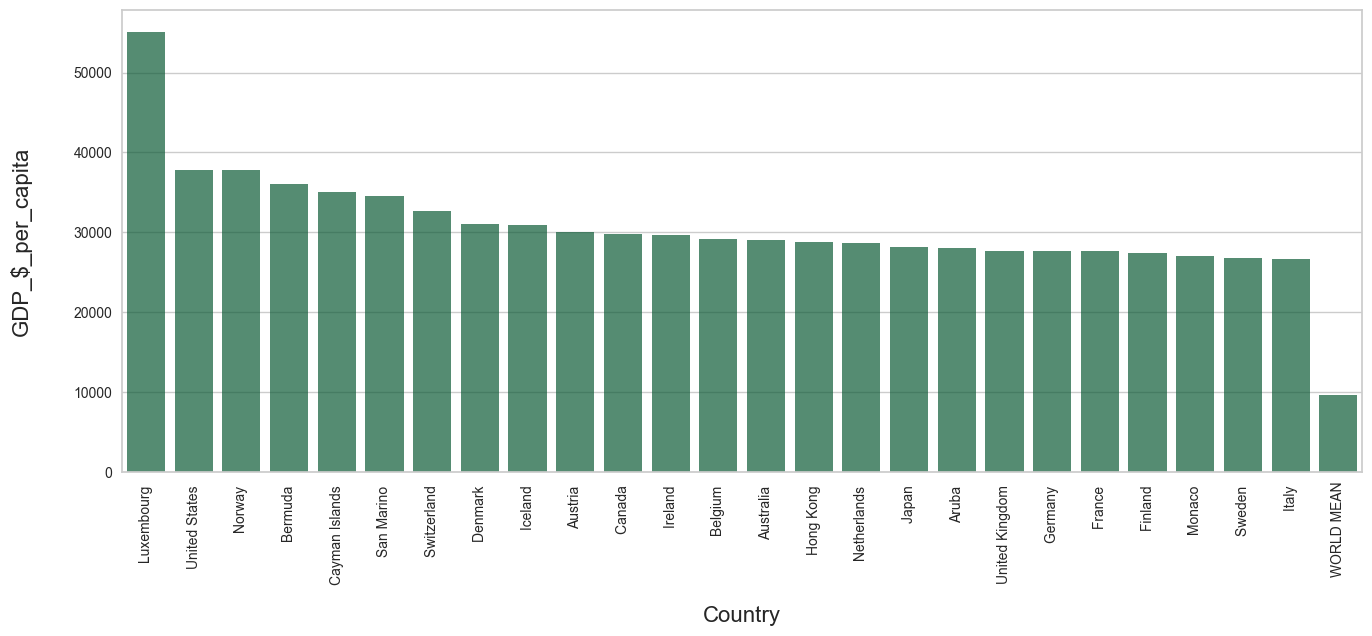

In [102]:
#ranking the top 25 countries
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP_$_per_capita',ascending=False).head(25)
mean = pd.DataFrame({'Country':['WORLD MEAN'], 'GDP_$_per_capita':[df['GDP_$_per_capita'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP_$_per_capita']],mean],ignore_index=True)
sns.barplot(data = gdps, x='Country', y='GDP_$_per_capita', alpha=0.7, color='#006838')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

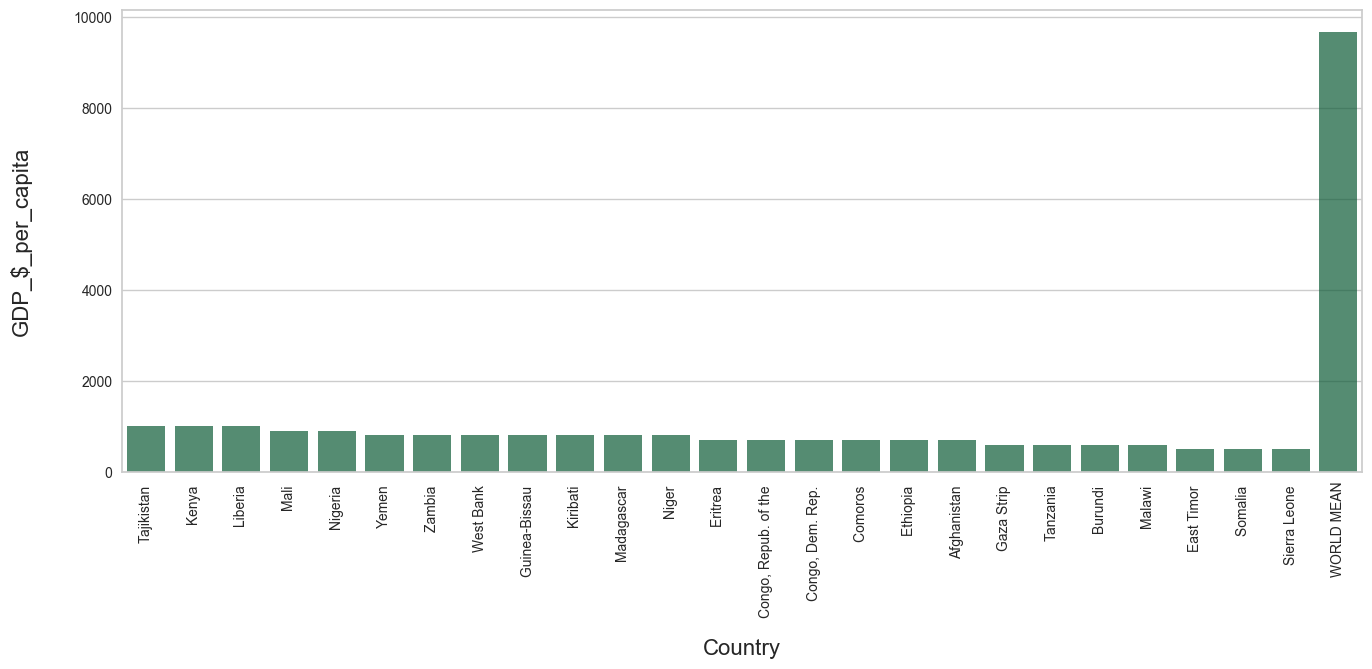

In [103]:
#ranking the last 25 countries
fig, ax = plt.subplots(figsize=(16,6))

top_gdp_countries = df.sort_values('GDP_$_per_capita',ascending=False).tail(25)
mean = pd.DataFrame({'Country':['WORLD MEAN'], 'GDP_$_per_capita':[df['GDP_$_per_capita'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP_$_per_capita']],mean],ignore_index=True)
sns.barplot(data = gdps, x='Country', y='GDP_$_per_capita', alpha=0.7, color='#006838')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

**Section 3.1 observations summary:**

---


*   The top 2 regions are Western Europe and Nothern America while Commonwealth of Independent States and Sun-Saharan Africa report the least GDP per capita.
*   In the leading Western Europe region,  Luxembourg and the United States are the countries with the highest GDP per capita. It is noteworthy that theirs is more than 3 times the world average.  
*   In the lagging Sub-Saharan Region, Somalia and Sierra Leone report the lowest GDP per Capita. Kenya is among the least 25 countries meaning it is ranked 203rd in the dataset as shown above.
*   In the modelling sections, it will be imperative to check whether the predicted values for the leading and lagging regions will differ, noting the huge variation in overall GDP per capita.




---



##  **3.2) Correlation between the variables**


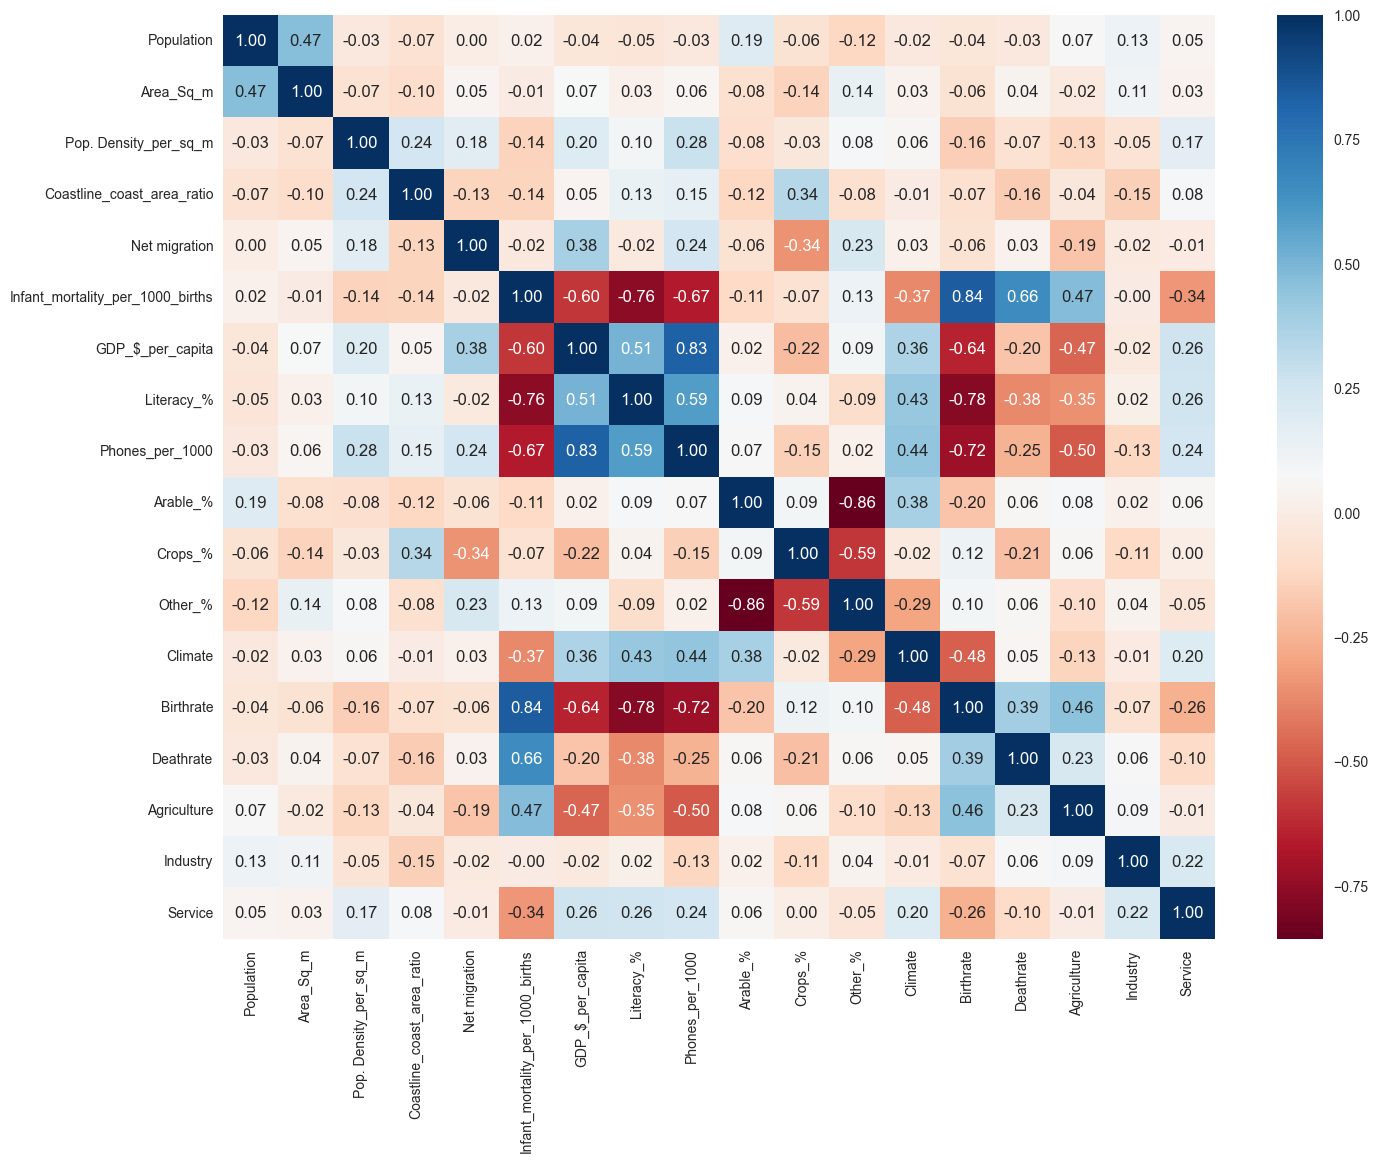

In [104]:
#correlation between the variables
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='RdBu')
plt.show()

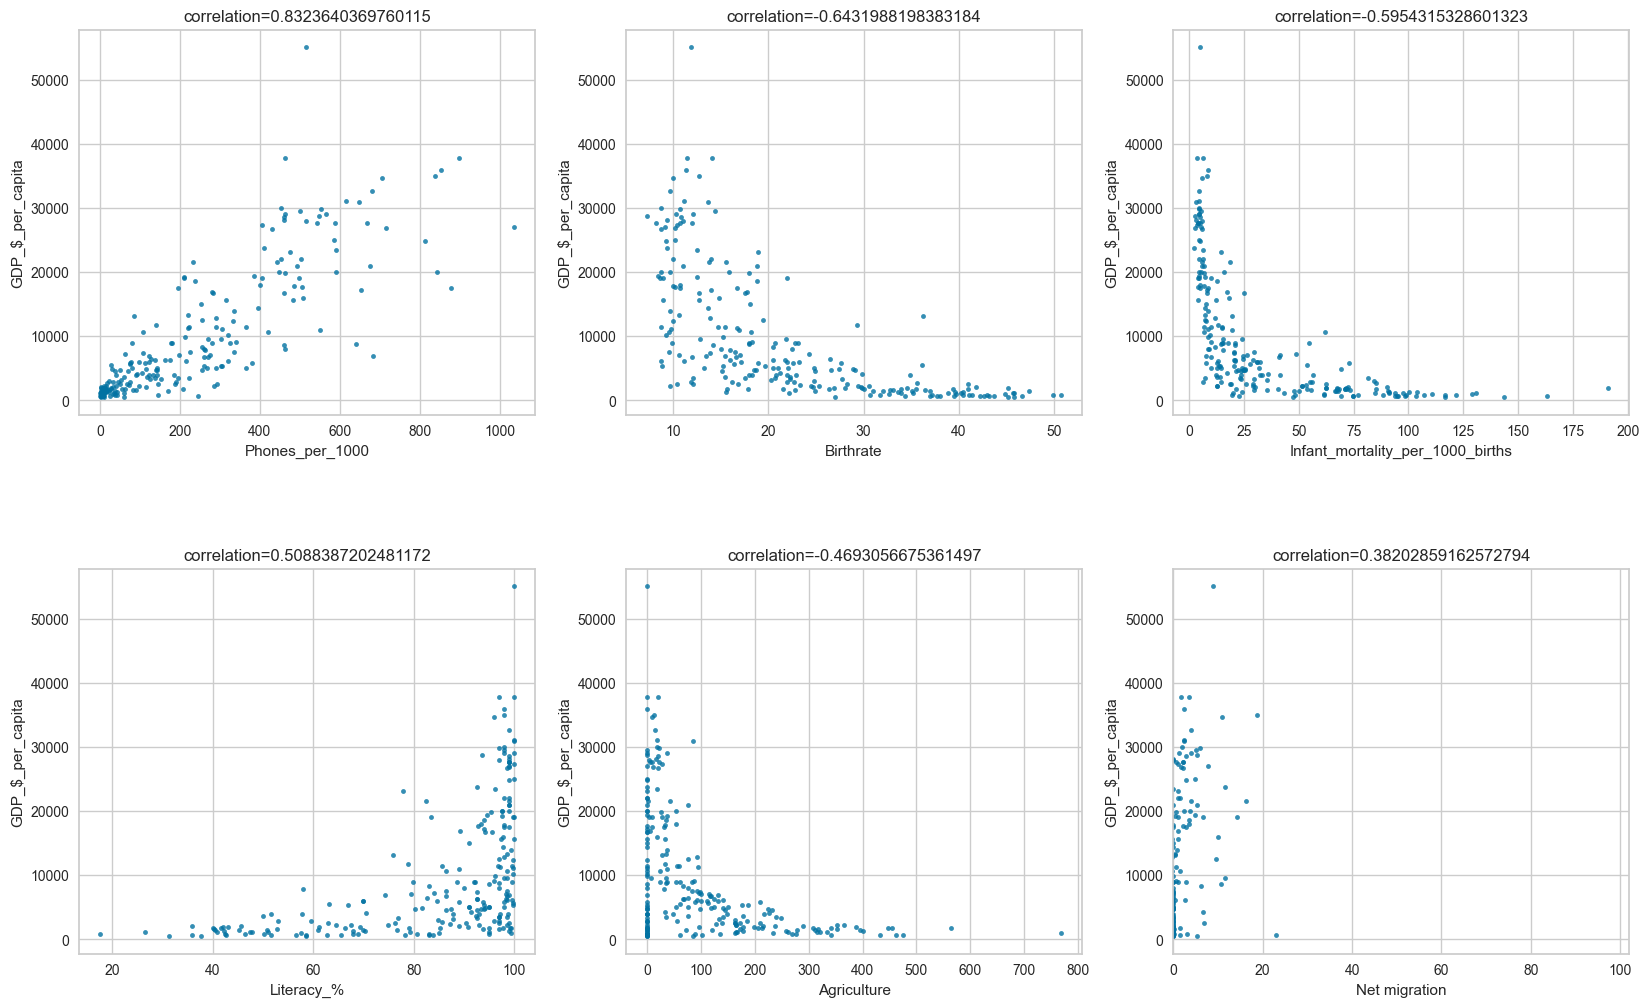

In [105]:
#top factors affecting GDP per capita
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP_$_per_capita')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP_$_per_capita'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP_$_per_capita', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

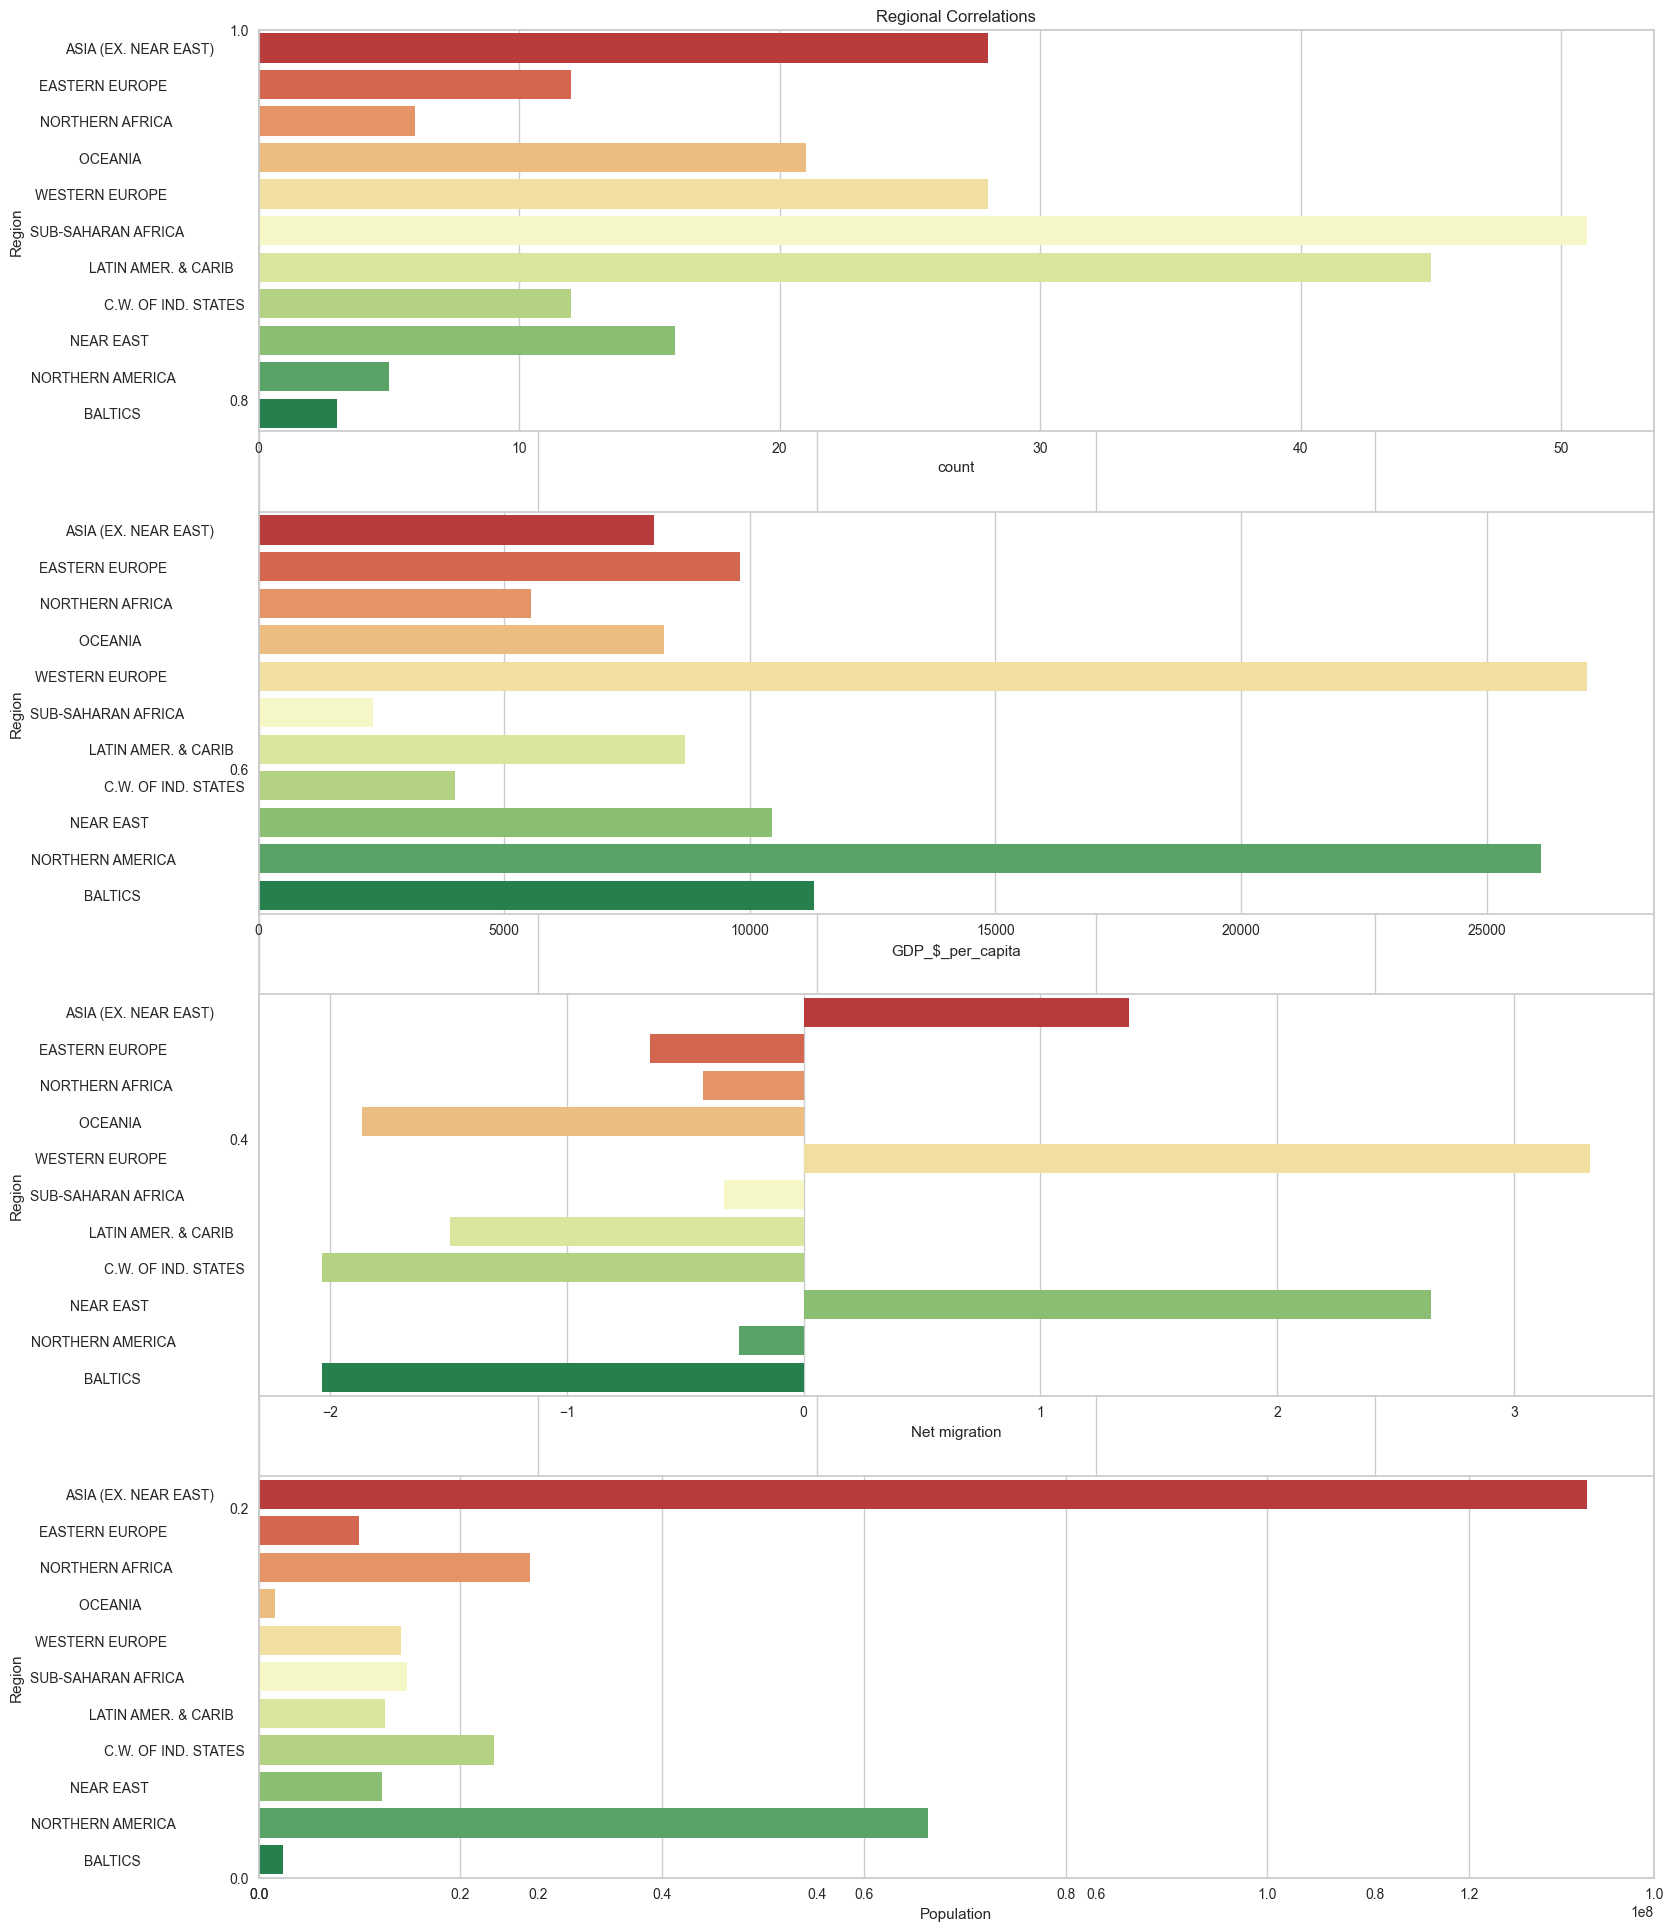

In [106]:
#checking the GDP, population and migration as per region
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Correlations')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= df, y= 'Region', ax= ax1, palette='RdYlGn')
sns.barplot(data= df, y= 'Region', x= 'GDP_$_per_capita', ax= ax2, palette='RdYlGn', ci= None)
sns.barplot(data= df, y= 'Region', x= 'Net migration', ax= ax3, palette='RdYlGn', ci= None)
sns.barplot(data= df, y= 'Region', x= 'Population', ax= ax4, palette='RdYlGn', ci= None)
plt.show()

**Section 3.2 observations summary:**

---


*   The six variables that are mostly correlated to GDP per capita are phones, birthrate, infant mortality, literacy, agriculture and net migration. This result aligns with majority of research that place technology, literacy levels and mortality rates as some of the biggest influencers.  


*   The fair correlation between the net migration and the GDP is accurate because migrants tend to move to countries with better opportunities and higher GDP per capita. As shown above, the highest migrations are in the Western Europe, Asia and Near East regions.


*   Interestingly, SSA and Latin America have the highest number of countries whereas Asia has the largest population. Nevertheless, Nothern America and Western Europe lead in terms of GDP per capita.


*  The analysis confirms that African countries typically have some of the lowest GDP per capita in the world.












---



# **Section 4) Modelling**

**Focus Questions:**

3. **Can a machine learning algorithm be trained on the various factors and then
accurately predict GDP per capita for any given country?**  

4. **Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa?**


I use two models to test my objectives namely a linear regression model and a random forest model with my target variable as the GDP per Capita.These are then assessed using the The models' performance was evaluated by calculating the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (coefficient of determination)


##  **4.1) Preprocessing**

**Label Encoding**


Two of my variables Region and Climate are categorical features and hence I first convert these into machine readable form so that the model takes them into consideration.

In [107]:
#label encoding the region and climate columns
LE = LabelEncoder()
df['Region_label'] = LE.fit_transform(df['Region'])
df['Climate_label'] = LE.fit_transform(df['Climate'])
df.head()

,Country,Region,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,75.50,142.00,560.50,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,9.00,213.50,674.50,10,4


## **4.2) Linear Regression Model**

In [108]:
#assigning the train and test samples of the data
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area_Sq_m',
       'Pop. Density_per_sq_m', 'Coastline_coast_area_ratio',
       'Net migration', 'Infant_mortality_per_1000_births',
       'Literacy_%', 'Phones_per_1000',
       'Arable_%', 'Crops_%', 'Other_%', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label']
target = 'GDP_$_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [109]:
#applying the linear regression
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
mae_train = mean_absolute_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
mae_test = mean_absolute_error(test_pred_Y, test_Y)
r2_train = r2_score(train_Y, train_pred_Y)
r2_test = r2_score(test_Y, test_pred_Y)

print('rmse_train:',rmse_train,'mae_train:',mae_train,'R squared train:',r2_train)
print('rmse_test:',rmse_test,'mae_test:',mae_test,'R squared test:',r2_test)

rmse_train: 4486.686310826471 mae_train: 2963.741238722454 R squared train: 0.7723663597126236
rmse_test: 4937.0853422666105 mae_test: 3436.906077568388 R squared test: 0.80540936137054


**Section 4.2 observations summary:**

---


*  The regression model assigns the GDP per capita as the dependent variable and all others as the independent variables.  

*  The output of the Linear Regression model shows that the RMSE for the training and test set is high which indicates that there are prediction errors and that the model may not be accurately capturing all the patterns and relationships in the training data. The R-squared of 0.74 means that the model explains about 74% of the variance in the training set.
*   For the test set, the RMSE and MAE are also high showing and the R-squared of 0.83 also shows that the model explains about 83% of the variance in the test set.

*   Overall, the model is not accurately capturing the patterns and relationships in the data. The high RMSE and MAE values on the testing set as compared to the traiuning set suggests the model might be overfitting to the training data, resulting in poorer performance on the unseen portion of the data. In the next step I try using a different model.










---



##  **4.3) Random Forest Model**

In [110]:
#applying the random forest model
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
mae_train = mean_absolute_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
mae_test = mean_absolute_error(test_pred_Y, test_Y)
r2_train = r2_score(train_Y, train_pred_Y)
r2_test = r2_score(test_Y, test_pred_Y)

print('rmse_train:',rmse_train,'mae_train:',mae_train,'R squared train:',r2_train)
print('rmse_test:',rmse_test,'mae_test:',mae_test,'R squared test:',r2_test)


rmse_train: 3204.4621583275684 mae_train: 1806.70316084405 R squared train: 0.8838831288355405
rmse_test: 4746.939711107594 mae_test: 3254.5223946439773 R squared test: 0.8201095507644611


**Section 4.3 observations summary:**

---

  

*  The output of the Random Forest model shows that the RMSE for the training is significant implying prediction errors and that the model may not be accurately capturing all the patterns and relationships in the training data. The R-squared of 0.90 also denotes that the model explains about 90% of the variance in the training set.
*   For the test set, the RMSE and MAE is also significant for the same reasons. The R-squared of 0.80  shows that the model explains about 80% of the variance in the test set.

*   The results show that the model may not be accurately capturing the patterns and relationships in the data. There is room for improvement in the performance of this model and I will apply a different approach and focus on one region in the next section.


















---



##  **4.4) Visualizing the results**
To check the model output, I make a scatter plot of prediction against the actuals. As you can see the model gives a resonable prediction, as majority of the data points are gathering around the line y=x.

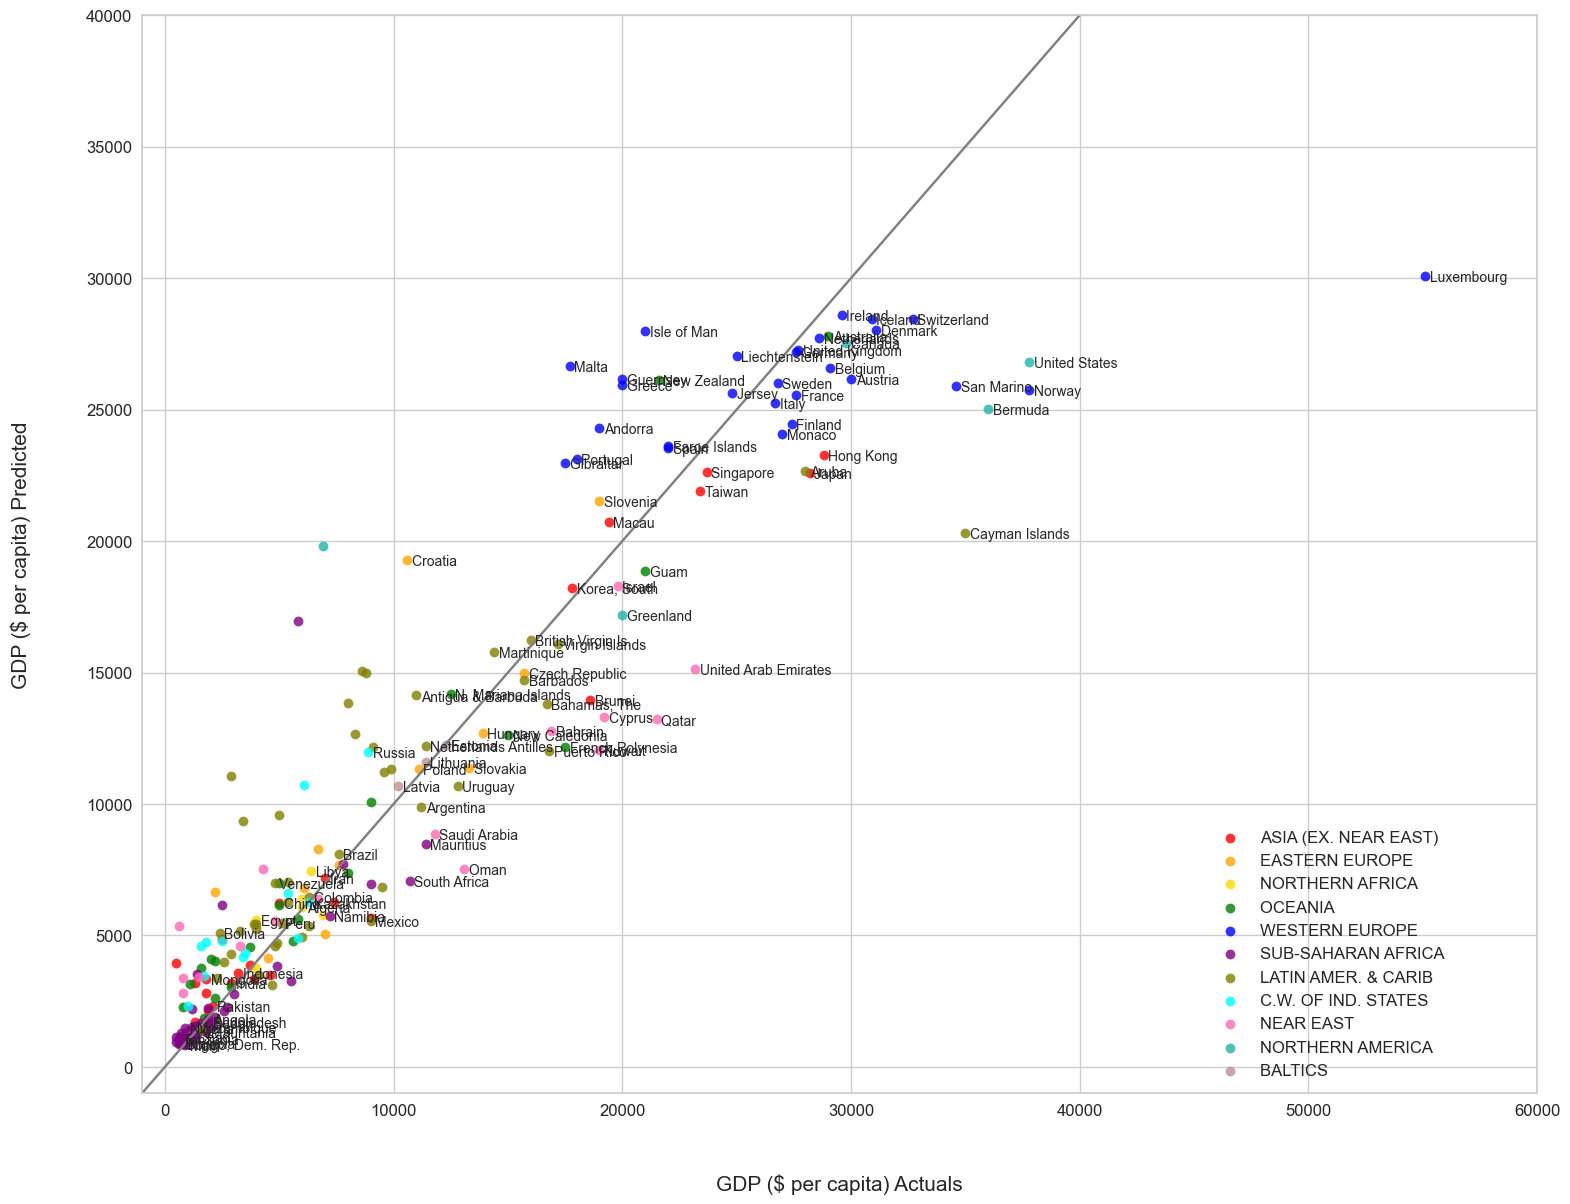

In [111]:
# Visualising the GDP per capita
plt.figure(figsize=(18,14))

# Concatenate the Series objects train_Y, test_Y, train_pred_Y, and test_pred_Y
train_test_Y = pd.concat([train_Y, test_Y])
train_test_pred_Y = pd.concat([train_pred_Y, test_pred_Y])

df_modelled = df.loc[train_test_Y.index]
label = df_modelled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[df_modelled['Region']==region]
    Y = train_test_pred_Y.loc[df_modelled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region)
plt.legend(loc=4,prop={'size': 12})

ax.set_xlabel('GDP ($ per capita) Actuals',labelpad=40)
ax.set_ylabel('GDP ($ per capita) Predicted',labelpad=40)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100)
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((df_modelled['Area_Sq_m'].iloc[i]>8e5) |
       (df_modelled['Population'].iloc[i]>1e8) |
       (df_modelled['GDP_$_per_capita'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

**Section 4.4 observations summary:**


---


Questions Answered:

**-> Can a machine learning algorithm be trained on the various factors and then accurately predict GDP per capita for any given country?**

The line y=x represents perfect predictions, where the predicted values exactly match the actual values. My data points cluster around this line, indicating that the models are accurately capturing the relationship between the geo-economic factors which are the independent variables and the GDP per capita which is the dependent variable.

Therefore, the output proves that the model can indeed predict the GDP per capita for the countries. As shown in the scatter plot above, the predicted vs actuals of majority of the countries are aligned as they are converge along the line.

*  There is some room for improvement for the model and an option for evaluating more models but I focus on this in the next section where I narrow down to one specific region.


**-> Will the accuracy of the predictions vary between Regions? e.g Europe vs Sub-Saharan Africa?**

Yes, the predicted values seem more accurate for the bottom 5 regions in terms of GDP per Capita as compared to the regions with higher GDP per Capita. In their research paper "National Income and Its Distribution',Brueckner and Lederman (2015) affirm that inequality on GDP per capita in different countries is greatly influenced by income inequalities and the effect this has on aggregate output.

Interestingly, countries in the lower GDP per Capita brackets often share similar socio-economic characteristics, presenting a more homogeneous economic landscape with fewer complexities. The above models, trained on data predominantly representing countries with lower economic development, seem to capture and generalize well to these common characteristics, thus yielding more accurate predictions.

In contrast, nations with higher GDP per Capita like Luxembourg likely exhibit greater economic diversity, intricate interdependencies, and non-linear relationships among geo-economic factors. These complexities may be the ones presenting challenges for the models in capturing the nuanced relationships accurately, leading to comparatively less precise predictions for countries in the higher GDP per Capita brackets.





  















---



#   **Section 5) A Deep Dive into Sub Saharan Africa (SSA) Region**

From the visualisation, it is evident that the model is more accurate for the low GDP regions as compared than Higher GDP regions. It is therefore imperative for me to redo the analysis with Sub-Saharan Africa as the focus to interrogate the factors that are more influential in this region. I can then use these insights to optimise my model and make a prediction for Kenya.

##  **5.1) Exploring the SSA data**

In [112]:
#extracting SSA data
SSA_df=(df[df['Region'].str.contains("SUB-SAHARAN AFRICA")])
SSA_df.head()

,Country,Region,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,2.0,45.11,24.20,96.0,658.0,246.0,9,2
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,...,2.40,79.52,2.0,38.85,12.22,316.0,138.0,546.0,9,2
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,79.8,...,0.01,99.34,1.0,23.08,29.50,24.0,469.0,507.0,9,0
31,Burkina Faso,SUB-SAHARAN AFRICA,13902972,274200,50.7,0.00,0.00,97.57,1100.0,26.6,...,0.19,85.38,2.0,45.62,15.60,322.0,196.0,482.0,9,2
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,290.7,0.00,-0.06,69.29,600.0,51.6,...,14.02,50.93,2.0,42.22,13.46,463.0,203.0,334.0,9,2


In [113]:
#describing the SSA data
SSA_df.describe()

,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,Phones_per_1000,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.0,51.000000
mean,1.469484e+07,4.772825e+05,92.264706,5.106078,-0.335098,80.039216,2323.529412,62.518627,42.507843,11.703333,3.728725,84.542549,1.892157,36.043922,15.16000,187.150588,210.896667,324.671765,9.0,1.784314
std,2.309189e+07,5.801928e+05,129.364174,16.961832,2.347984,33.440061,2614.084026,19.240933,84.084812,12.174566,8.125418,16.163954,0.461668,9.221798,6.12156,173.630747,191.788018,244.828080,0.0,0.923336
min,7.502000e+03,3.740000e+02,2.500000,0.000000,-12.070000,7.780000,500.000000,17.600000,0.200000,0.040000,0.000000,40.810000,1.000000,12.130000,5.49000,0.030000,0.040000,0.210000,9.0,0.000000
25%,1.540931e+06,2.794050e+04,17.350000,0.000000,-0.140000,62.105000,800.000000,46.950000,4.000000,3.585000,0.135000,80.015000,2.000000,33.335000,10.47000,24.500000,27.285000,0.610000,9.0,2.000000
50%,8.090068e+06,2.458570e+05,39.600000,0.130000,0.000000,76.830000,1300.000000,62.950000,9.700000,7.580000,0.725000,90.380000,2.000000,37.980000,14.86000,163.000000,203.000000,387.000000,9.0,2.000000
75%,1.562184e+07,7.771020e+05,101.050000,0.765000,0.000000,96.445000,2150.000000,79.550000,26.800000,13.250000,2.580000,95.585000,2.000000,41.990000,19.08500,313.500000,278.500000,526.500000,9.0,2.000000
max,1.318597e+08,2.505810e+06,608.300000,107.910000,6.780000,191.190000,11400.000000,97.000000,380.900000,49.260000,48.960000,99.960000,3.000000,50.730000,29.74000,769.000000,906.000000,684.000000,9.0,4.000000


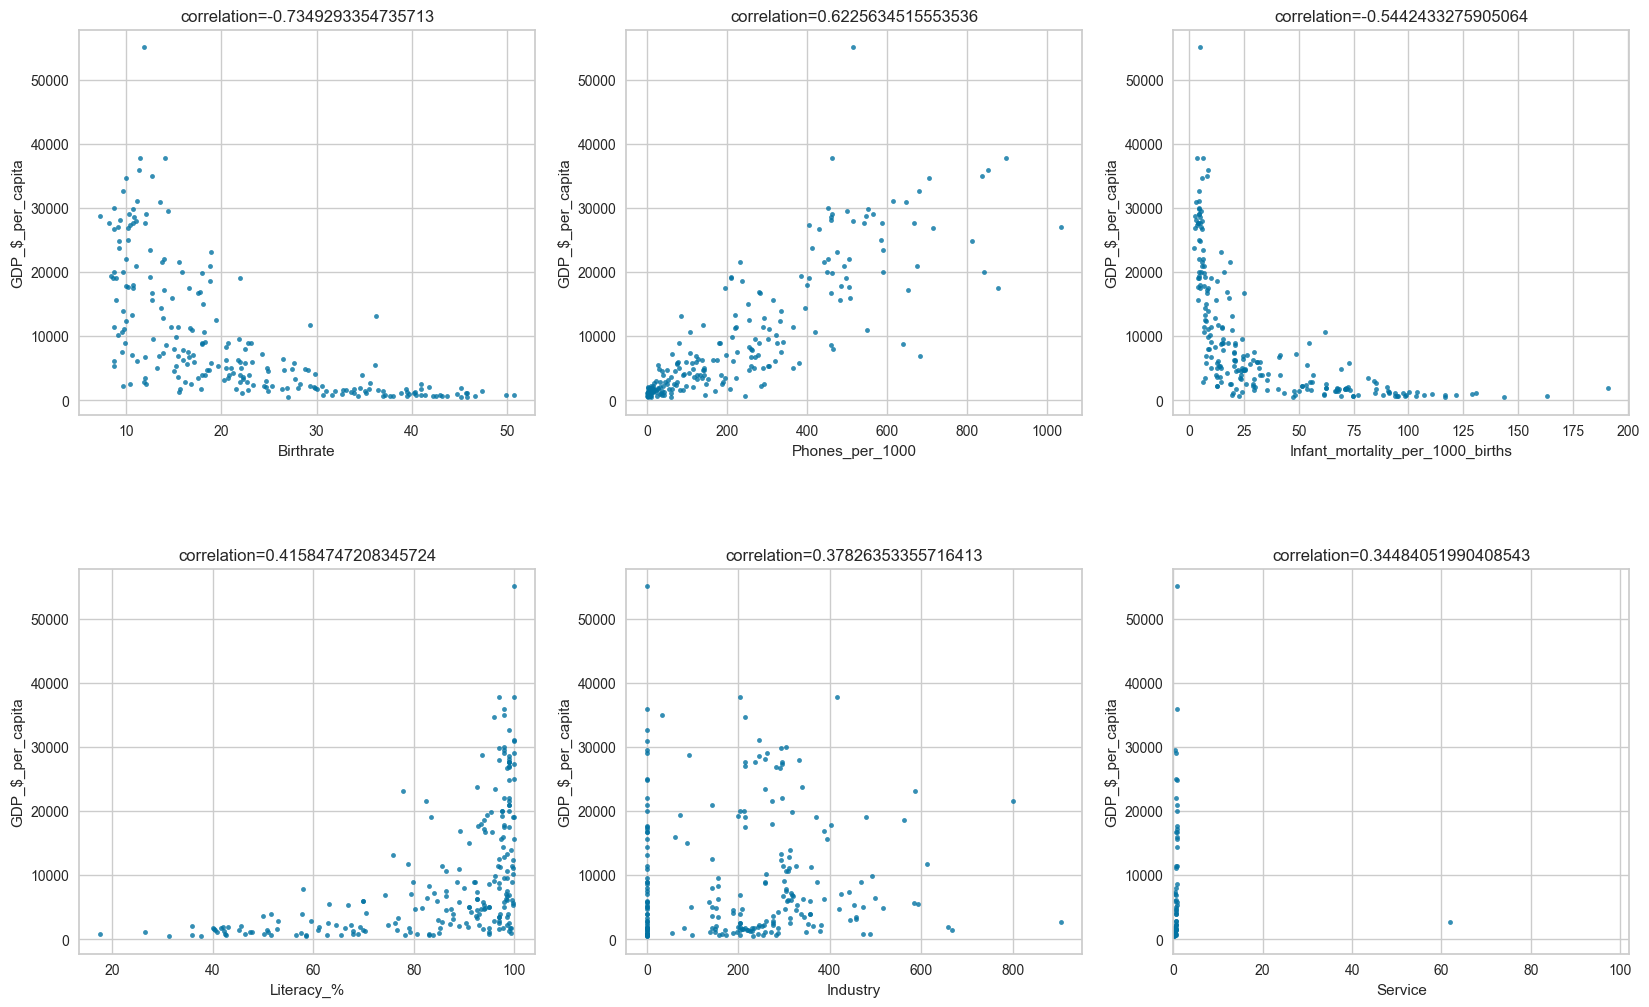

In [114]:
#top factors affecting GDP per capita in SSA
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in SSA_df.columns.values[2:]:
    if ((col!='GDP_$_per_capita')&(col!='Climate')):
        corr_to_gdp[col] = SSA_df['GDP_$_per_capita'].corr(SSA_df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP_$_per_capita', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

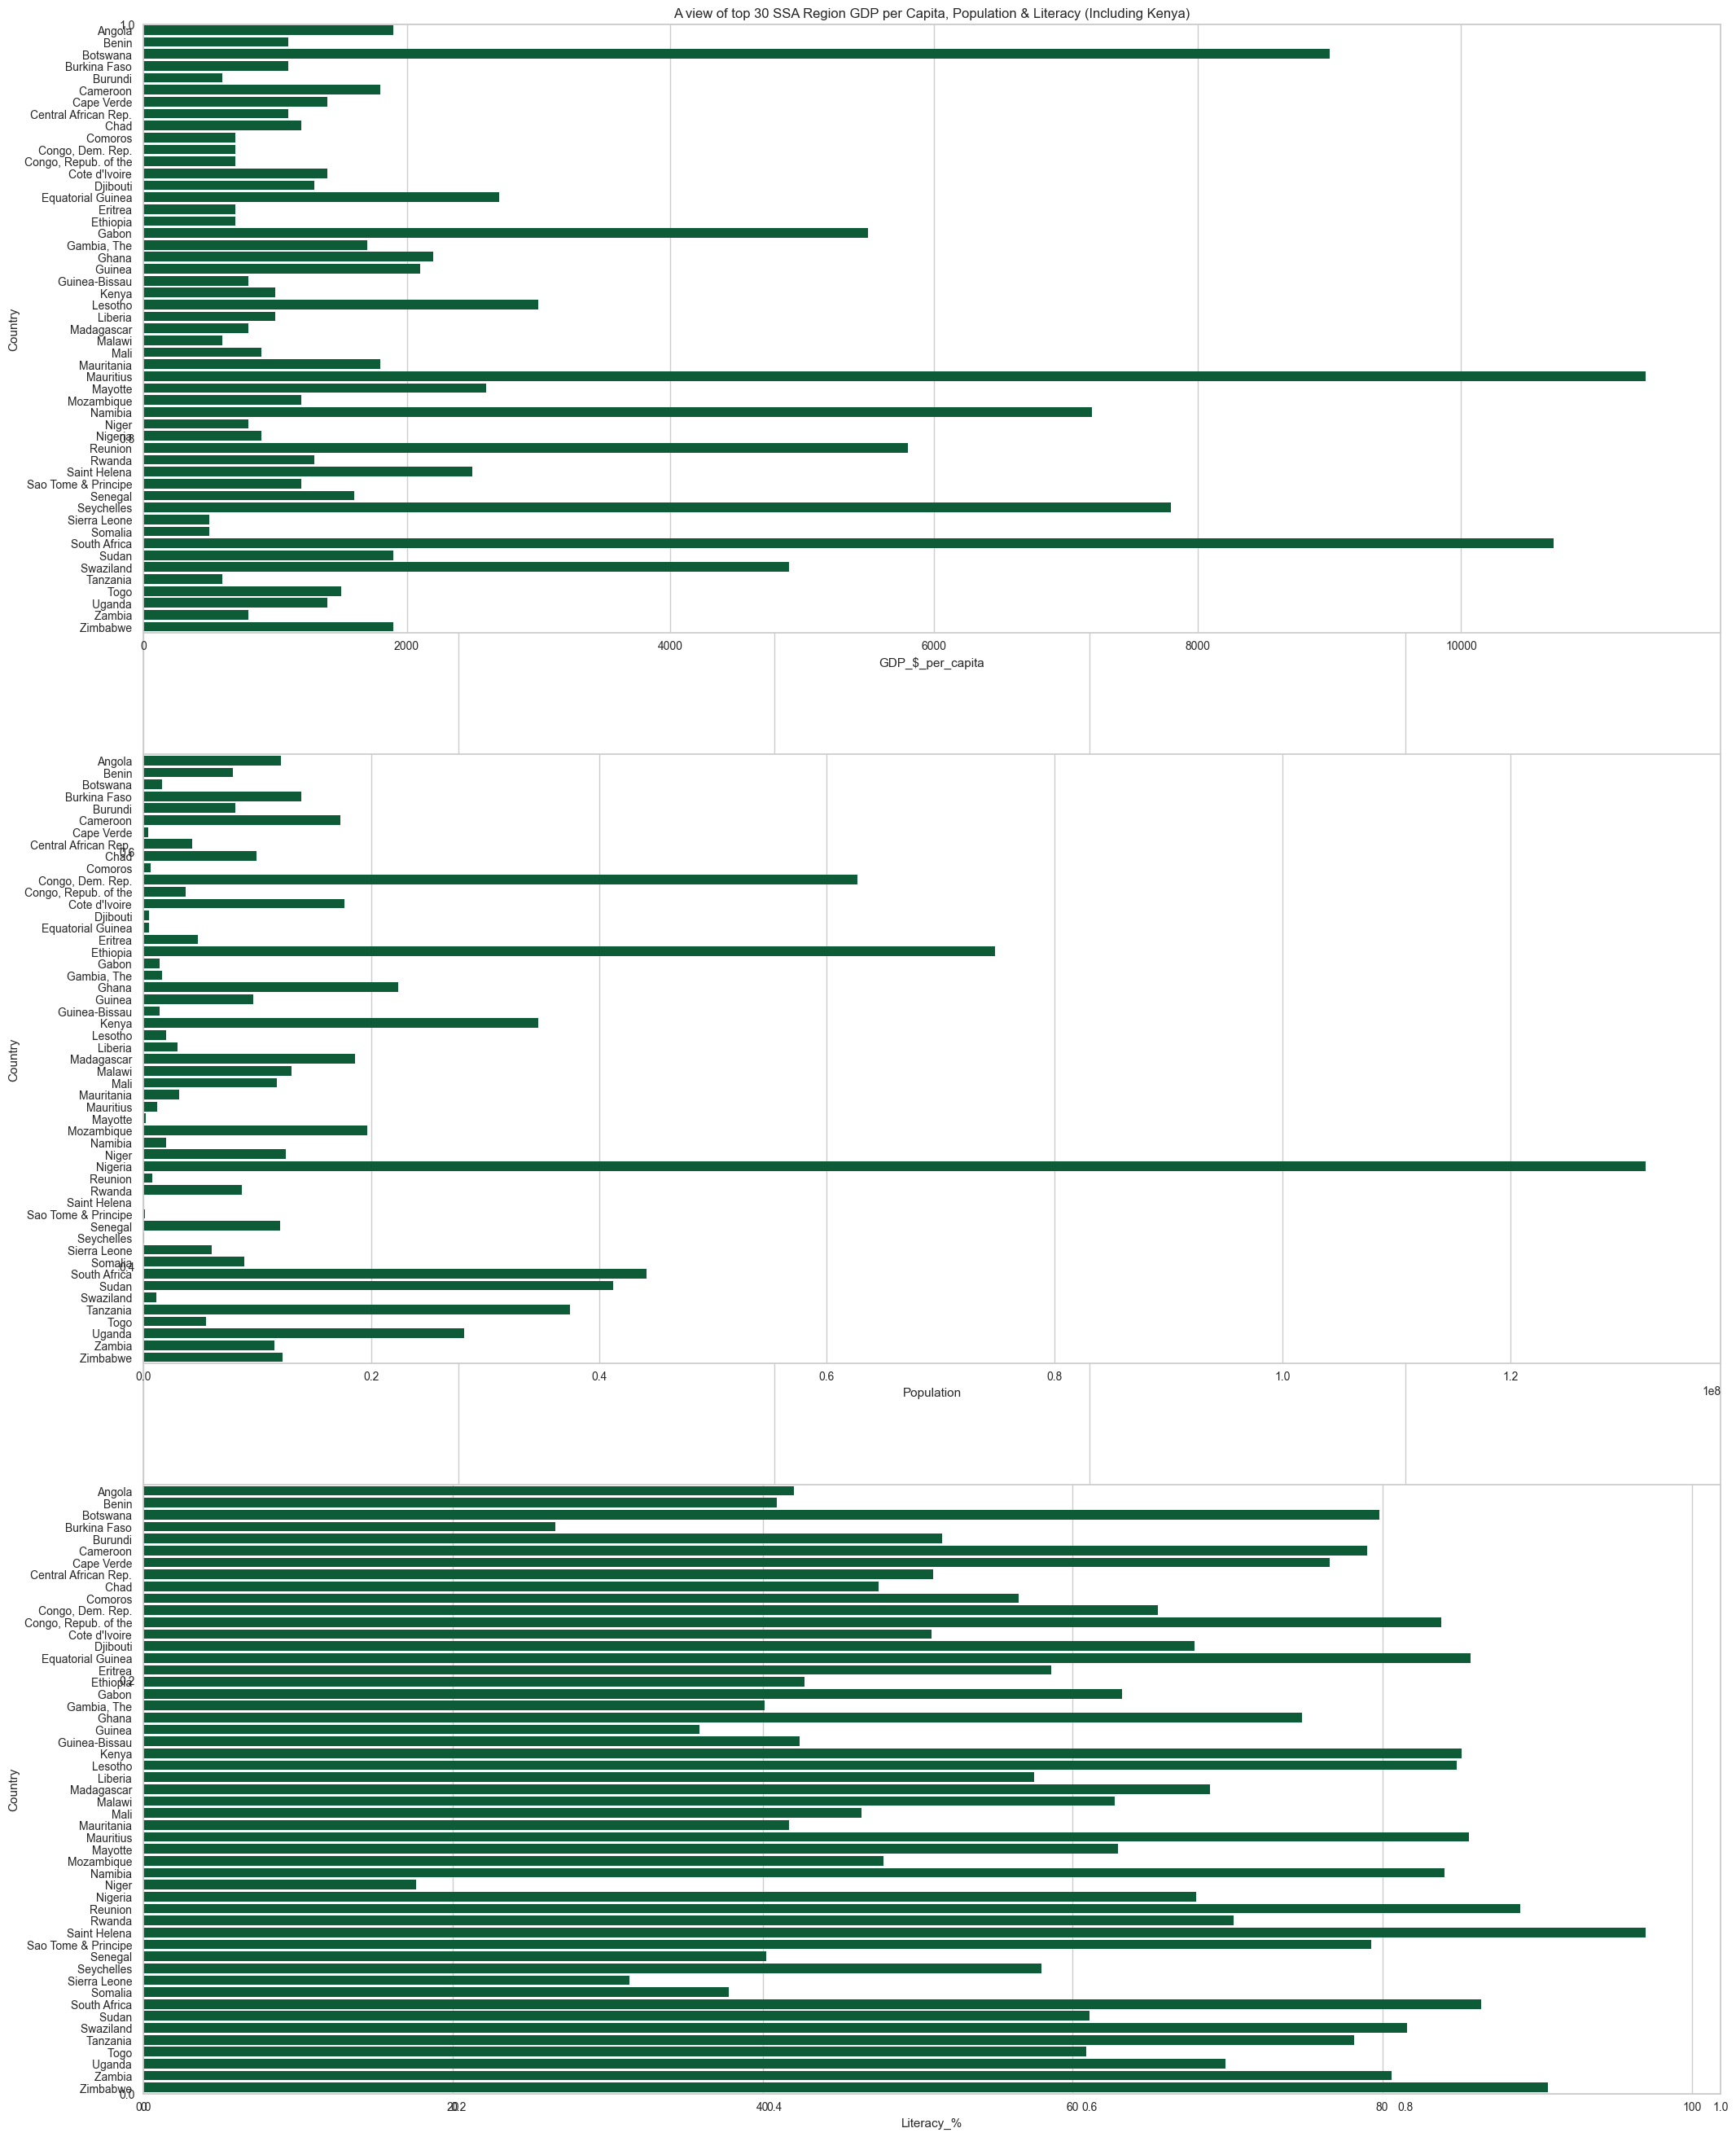

In [115]:
#investigating the GDP, population and literacy in the SSA region
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(25, 33))
plt.title('A view of top 30 SSA Region GDP per Capita, Population & Literacy (Including Kenya)')
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

sns.barplot(data= SSA_df, y= 'Country', x= 'GDP_$_per_capita', ax= ax1, color='#006838', ci= None)
sns.barplot(data= SSA_df, y= 'Country', x= 'Population', ax= ax2, color='#006838', ci= None)
sns.barplot(data= SSA_df, y= 'Country', x= 'Literacy_%', ax= ax3, color='#006838', ci= None)
plt.show()

<Figure size 2000x2000 with 0 Axes>

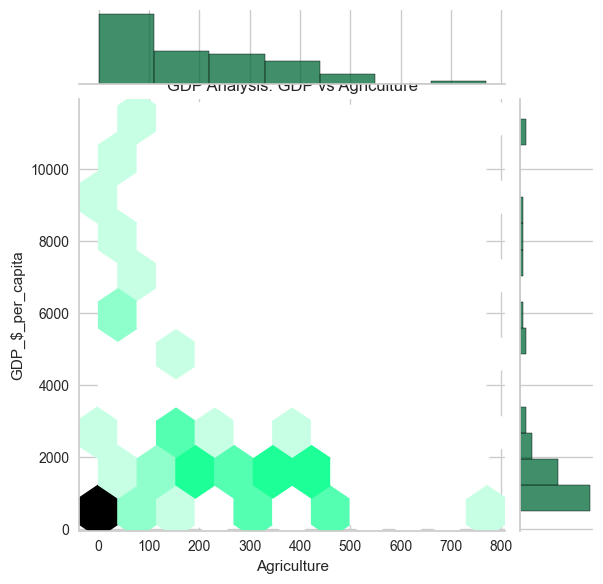

In [116]:
#a closer look at GDP vs Agriculture
fig = plt.figure(figsize=(20, 20))
sns.jointplot(data= SSA_df, x= 'Agriculture', y= 'GDP_$_per_capita', kind= 'hex',color='#006838')
plt.title('GDP Analysis: GDP vs Agriculture')
plt.show()

**Section 5.1 observations summary:**

---

  

*  In SSA the top countries in terms of GDP per Capita are South Africa, Mauritius, Namibia, Seychelles and Botswana and Gabon. A deeper literature review of what makes these countries lead amongst their peers confirms that in Africa the heavily agriculture, mineral and tourism based economies do better.  Eg. the economy of Gabon is also heavily dependent on its oil reserves and revenue from oil production accounts for about 43% of the country’s GDP and 81% of its exports. Botswana is boosted by its abundant natural resources such as gemstones and precious metals and South Africa benefits greatly from the production of electricity as it has a nuclear power plant(Mappr, 2023).

*   Kenya is among the contries with the highest population, with Nigeria, Ethiopia and Congo leading as at the time of this dataset. Rapid population growth that is does not grow at par with other economoc and infrastructural development tends to result in declines in GDPdue to increased per capita food consumption, poorer land quality and overally high dependency ratios. This explains the disparity in population vs the GDP per capita in the dataset.



*   From the dataset the literacy levels are mostly uniform in SSA with Kenya also among the countries with the highest literacy levels. On the other hand, I was surprised by the relationship between GDP and Agriculture as shown by the hex above but this proves that it cannot stand as a strong factor economically by itself especially in countries with high population. GDP per capita needs vibrancy, investment and growth in multiple economic activities to boost the overall GDP.



















---



##  **5.2) Pre-processing the SSA data**

In this section I start by preprocessing the SSA data in preparation for modelling. I also use a feature selection technique to complement Principal component analysis (PCA) to reduce the dimensionality of my data and pinpoint the key GDP per capital variables for the SSA region. This will ensure my prediction for Kenya will be more accurate.

In [117]:
#normalising the data in preparation for modelling
SSA_df_normalised = SSA_df.copy()
cols = ['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m',
       'Coastline_coast_area_ratio', 'Net migration',
       'Infant_mortality_per_1000_births', 'GDP_$_per_capita', 'Literacy_%',
       'Phones_per_1000', 'Arable_%', 'Crops_%', 'Other_%', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']
SSA_df_normalised[cols] = minmax_scale(SSA_df_normalised[cols])
SSA_df_normalised = SSA_df_normalised.drop(columns=['Country', 'Region', 'Region_label','Climate_label'])
SSA_df_normalised.head()


,Population,Area_Sq_m,Pop. Density_per_sq_m,Coastline_coast_area_ratio,Net migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,Phones_per_1000,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,0.091918,0.497449,0.011885,0.001205,0.640318,1.000000,0.128440,0.307305,0.019963,0.048151,0.004902,0.955875,0.5,0.854404,0.771546,0.124803,0.726257,0.359452
21,0.059578,0.044801,0.111093,0.001019,0.640318,0.421024,0.055046,0.293451,0.024954,0.366518,0.049020,0.654438,0.5,0.692228,0.277526,0.410900,0.152280,0.798184
26,0.012380,0.239478,0.000330,0.000000,0.640318,0.255166,0.779817,0.783375,0.210927,0.012393,0.000204,0.989518,0.0,0.283679,0.990103,0.031172,0.517639,0.741149
31,0.105387,0.109293,0.079564,0.000000,0.640318,0.489559,0.055046,0.113350,0.017862,0.292361,0.003881,0.753508,0.5,0.867617,0.416907,0.418703,0.216301,0.704588
33,0.061300,0.010959,0.475735,0.000000,0.637135,0.335369,0.009174,0.428212,0.008406,0.711296,0.286356,0.171090,0.5,0.779534,0.328660,0.602065,0.224028,0.488147


In [118]:
#PCA
pca = PCA(n_components=10)
PC = pca.fit_transform(SSA_df_normalised)
pca_SSA = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10'])

pca_SSA.head(6)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.695262,-0.212473,-0.093500,0.400189,0.000784,-0.212302,-0.252983,0.391828,0.081817,-0.058367
1,0.062317,0.194827,-0.377688,-0.172908,-0.152308,-0.046825,-0.174190,-0.088044,-0.016367,0.038539
2,0.165487,-1.024779,-0.026859,0.320810,0.232550,-0.387628,0.091005,-0.051839,-0.203541,0.047524
3,-0.214003,0.175880,-0.382263,-0.125699,-0.147123,-0.125975,-0.313979,-0.027634,-0.023825,0.008723
4,0.330103,0.819208,-0.308968,0.066103,0.091166,-0.138448,-0.035515,-0.043280,-0.082490,0.083338
5,0.030946,-0.000342,-0.202935,-0.135147,0.101197,0.227037,0.138518,-0.292768,-0.127728,0.114261


Text(0.5, 0, 'Principal Components')

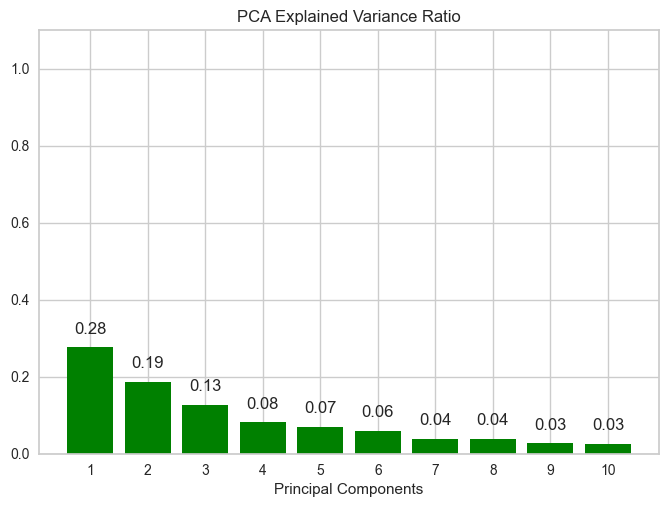

In [119]:
#visualising the PCA
fig, ax = plt.subplots(nrows=1,
                       ncols=1)
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_,
    color= "green"
)

for x, y in zip(np.arange(len(df.columns)) + 1,
                pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('PCA Explained Variance Ratio')
ax.set_xlabel('Principal Components')

In [120]:
#dropping the GDP per capita column from the independent variables and assigning it as the target variables
X1 = SSA_df_normalised.drop(columns=['GDP_$_per_capita'])
y1 = pd.DataFrame(SSA_df_normalised['GDP_$_per_capita'])


In [121]:
#Backward elimination code below iterates through the predictors until only the significant variables are chosen
warnings.simplefilter(action='ignore', category=FutureWarning)

cols = list(X1)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m', 'Infant_mortality_per_1000_births', 'Climate', 'Birthrate', 'Deathrate', 'Industry']


In [122]:
#identifying the details of the featues identified as the most important
x1 = X1.filter(['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m', 'Infant_mortality_per_1000_births', 'Climate', 'Birthrate', 'Deathrate', 'Industry'])
x1.head()

,Population,Area_Sq_m,Pop. Density_per_sq_m,Infant_mortality_per_1000_births,Climate,Birthrate,Deathrate,Industry
5,0.091918,0.497449,0.011885,1.000000,0.5,0.854404,0.771546,0.726257
21,0.059578,0.044801,0.111093,0.421024,0.5,0.692228,0.277526,0.152280
26,0.012380,0.239478,0.000330,0.255166,0.0,0.283679,0.990103,0.517639
31,0.105387,0.109293,0.079564,0.489559,0.5,0.867617,0.416907,0.216301
33,0.061300,0.010959,0.475735,0.335369,0.5,0.779534,0.328660,0.224028


In [123]:
#creating a dataframe with only the most important features
SSA_df2 = x1.join(y1)
SSA_df2.head()

,Population,Area_Sq_m,Pop. Density_per_sq_m,Infant_mortality_per_1000_births,Climate,Birthrate,Deathrate,Industry,GDP_$_per_capita
5,0.091918,0.497449,0.011885,1.000000,0.5,0.854404,0.771546,0.726257,0.128440
21,0.059578,0.044801,0.111093,0.421024,0.5,0.692228,0.277526,0.152280,0.055046
26,0.012380,0.239478,0.000330,0.255166,0.0,0.283679,0.990103,0.517639,0.779817
31,0.105387,0.109293,0.079564,0.489559,0.5,0.867617,0.416907,0.216301,0.055046
33,0.061300,0.010959,0.475735,0.335369,0.5,0.779534,0.328660,0.224028,0.009174


**Section 5.2 observations summary:**


---



*   The above section was aimed at selecting the most important features in the SSA data. The PCA confirmed that some components are more significant than others and I paired this with the backward elimination process which helped me to refine the features further and pinpoint exactly what they were.
*   The backward elimination process selects a P-value level of 0.05, fits the model with all features, identifies features with the highest P-value,
removes the feature with highest P-value, fits the model again and repeats the Backward Elimination until we remove all features with p-value higher the significance level. Optimal features were identified as population, area, population density, infant mortality, climate, birthrate, deathrate and industry.







  















---



##  **5.3) Modelling the SSA data**

I proceed to use the Random Forest and the Linear Regression models to model the key aforementioned features of the smaller Sub Saharan Africa region against my target variable which is the GDP per Capita variable. In this section, I also apply the XGBoost model for a further inspection of how accurate the predictions focusing on this one region will be to allow for a comparative analysis of the model performances.

##**5.3.1) Optimised Random Forest Model**





In [124]:
#assigning the train and test samples of the data
train, test = train_test_split(SSA_df2, test_size=0.2, shuffle=True)
training_features = ['Population', 'Area_Sq_m', 'Pop. Density_per_sq_m', 'Infant_mortality_per_1000_births', 'Climate', 'Birthrate', 'Deathrate', 'Industry']
target = 'GDP_$_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [125]:
#Create the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10],
    'min_weight_fraction_leaf': [0.01, 0.05, 0.1],
    'max_features': [0.7, 0.8, 0.9]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(train_X, train_Y)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize the model with the best parameters
best_rf = RandomForestRegressor(random_state=42, **best_params)

# Fit the model with the best parameters
best_rf.fit(train_X, train_Y)

# Make predictions on train and test sets
train_pred_Y = best_rf.predict(train_X)
test_pred_Y = best_rf.predict(test_X)

# Calculate evaluation metrics
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
mae_train = mean_absolute_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
mae_test = mean_absolute_error(test_pred_Y, test_Y)
r2_train = r2_score(train_Y, train_pred_Y)
r2_test = r2_score(test_Y, test_pred_Y)

# Print the evaluation metrics
print('Best Parameters:', best_params)
print('RMSE Train:', rmse_train, 'MAE Train:', mae_train, 'R-squared Train:', r2_train)
print('RMSE Test:', rmse_test, 'MAE Test:', mae_test, 'R-squared Test:', r2_test)

Best Parameters: {'max_depth': 8, 'max_features': 0.9, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50}
RMSE Train: 0.11162103175952574 MAE Train: 0.06477776867627785 R-squared Train: 0.7992283909009099
RMSE Test: 0.058616224120561604 MAE Test: 0.049049843123237596 R-squared Test: 0.897984256699407


**Section 5.3.1 observations summary:**

---

  

*  As compared to the random forest modelling I had applied to all countries in the dataset before, the output of the Random Forest model applied to the Sub Saharan Africa region is quite impressive showing a relatively small difference between the predicted and actual values. By narrowing down to the SSA region, I gained a better understanding of the characteristics of the data that are most relevant to Kenya and reduces the amount of noise and hude variations between the high and lower ranked countries that may have skewed the output in the previous section 4.3.









---



##**5.3.2) Optimised XGBoost Model**

In [126]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(train_X, train_Y)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize the model with the best parameters
best_xgb = xgb.XGBRegressor(random_state=42, **best_params)

# Fit the model with the best parameters
best_xgb.fit(train_X, train_Y)

# Make predictions on train and test sets
train_pred_Y_xgb = best_xgb.predict(train_X)
test_pred_Y_xgb = best_xgb.predict(test_X)

# Calculate evaluation metrics
rmse_train_xgb = np.sqrt(mean_squared_error(train_pred_Y_xgb, train_Y))
mae_train_xgb = mean_absolute_error(train_pred_Y_xgb, train_Y)
rmse_test_xgb = np.sqrt(mean_squared_error(test_pred_Y_xgb, test_Y))
mae_test_xgb = mean_absolute_error(test_pred_Y_xgb, test_Y)
r2_train_xgb = r2_score(train_Y, train_pred_Y_xgb)
r2_test_xgb = r2_score(test_Y, test_pred_Y_xgb)

# Print the evaluation metrics
print('Best Parameters:', best_params)
print('RMSE Train:', rmse_train_xgb, 'MAE Train:', mae_train_xgb, 'R-squared Train:', r2_train_xgb)
print('RMSE Test:', rmse_test_xgb, 'MAE Test:', mae_test_xgb, 'R-squared Test:', r2_test_xgb)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.7}
RMSE Train: 0.0009332915942774083 MAE Train: 0.0006336036288294829 R-squared Train: 0.999985963948815
RMSE Test: 0.24886666287874354 MAE Test: 0.16868629044634884 R-squared Test: -0.8389290293182965


##**5.3.3) Linear Regression Model**





In [127]:
# Train a Linear Regression model
ml = LinearRegression()
ml.fit(train_X, train_Y)

# Make predictions on train and test sets
train_pred_Y_linear = ml.predict(train_X)
test_pred_Y_linear = ml.predict(test_X)

# Calculate evaluation metrics for Linear Regression
rmse_train_linear = np.sqrt(mean_squared_error(train_Y, train_pred_Y_linear))
mae_train_linear = mean_absolute_error(train_Y, train_pred_Y_linear)
r2_train_linear = r2_score(train_Y, train_pred_Y_linear)

rmse_test_linear = np.sqrt(mean_squared_error(test_Y, test_pred_Y_linear))
mae_test_linear = mean_absolute_error(test_Y, test_pred_Y_linear)
r2_test_linear = r2_score(test_Y, test_pred_Y_linear)

# Print the evaluation metrics for Linear Regression
print('Linear Regression:')
print('RMSE Train:', rmse_train_linear, 'MAE Train:', mae_train_linear, 'R-squared Train:', r2_train_linear)
print('RMSE Test:', rmse_test_linear, 'MAE Test:', mae_test_linear, 'R-squared Test:', r2_test_linear)

# Make predictions using x1 (or any other set of features)
predicted_gdp = ml.predict(x1)

# Print or view the predicted GDP values
print("\nPredicted GDP values using the Linear Regression model:")
print(predicted_gdp)

Linear Regression:
RMSE Train: 0.09951126363621544 MAE Train: 0.07540893218146666 R-squared Train: 0.8404287243799826
RMSE Test: 0.12530207996371162 MAE Test: 0.10743361053859855 R-squared Test: 0.5338259650567534

Predicted GDP values using the Linear Regression model:
[ 0.07193967 -0.02465706  0.81538405 -0.07297316  0.16873748  0.13202642
  0.07058828  0.11775212  0.08199685  0.10008413  0.01179271 -0.12838078
  0.05599075  0.16599498  0.26795647  0.10313931 -0.02392746  0.22218933
  0.06197766  0.16285588  0.04074645 -0.05197529  0.13840442  0.39166978
 -0.07865694 -0.03269657  0.01866001 -0.11085277  0.16408316  0.81117329
  0.30148897  0.14953807  0.61572997  0.07025555  0.06036271  0.45596699
  0.07600523  0.37330376  0.07039244  0.10066679  0.48018209 -0.11925594
  0.00632081  0.69045435  0.2640108   0.50622172  0.05820797  0.04605241
 -0.04882568  0.06689654  0.35247847]


In [128]:
#creating a dataframe of the actual vs the predicted gdp per capita
predicted = pd.DataFrame(predicted_gdp, columns=['Predicted_GDP_per_Capita'])
country = predicted.assign(Country = SSA_df['Country'].values)
summary = country.assign(Actual_GDP_per_Capita = SSA_df_normalised['GDP_$_per_capita'].values)
summary = summary[['Country', 'Actual_GDP_per_Capita', 'Predicted_GDP_per_Capita']]
summary.head()

,Country,Actual_GDP_per_Capita,Predicted_GDP_per_Capita
0,Angola,0.128440,0.071940
1,Benin,0.055046,-0.024657
2,Botswana,0.779817,0.815384
3,Burkina Faso,0.055046,-0.072973
4,Burundi,0.009174,0.168737


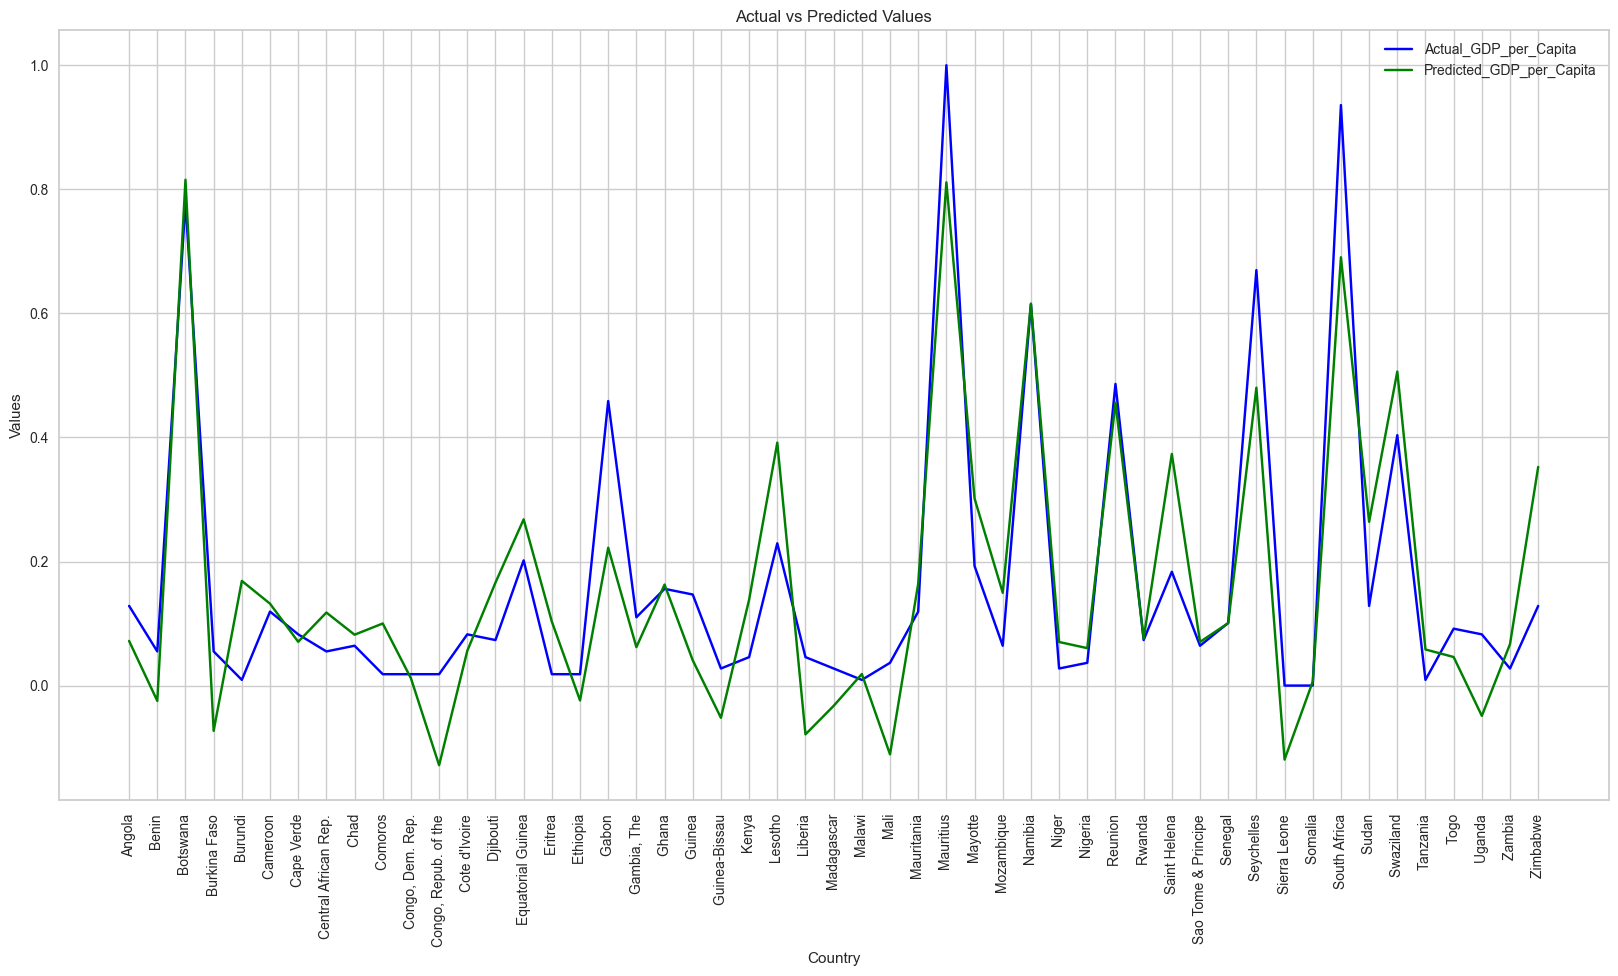

In [129]:
#plotting the model predictions
plt.figure(figsize=(20,10))
plt.plot(summary['Country'], summary['Actual_GDP_per_Capita'], color='blue')
plt.plot(summary['Country'], summary['Predicted_GDP_per_Capita'], color='green')
plt.title('Actual vs Predicted Values')
plt.xlabel('Country')
plt.ylabel('Values')
plt.legend(['Actual_GDP_per_Capita','Predicted_GDP_per_Capita'])
plt.xticks(rotation=90)
plt.show()

**Section 5.3.2 observations summary:**

---

  

*  The visual above confirms that as compared to the modelling applied for all countries, the predictions of the  SSA model are largely accurate. Granted, there are 6 countries where the predicted values differed considerably form the predicted values. With a further investigation of the features most highly correlated values with their GDP per capita it is likely that a different mix of factors specific to these countries may be optimal. However, the predictions for majority of the countries are accurate and I am comfortable to proceed with the model.








---





 **CONCLUSION**


---




The project has confirmed that machine learning can be used to investigate the patterns in the factors that affect GDP per capita for different countries and to develop a model that can predict the GDP when the most critical of these these factors are used as inputs. All the objective questions have been answered and explained in the respective sections observation summary notes. The project denotes the importance of diving deeper into the GDP specificities for countries per region for better model outcomes instead of analysing GDP globally. The model can aid in scenario planning, risk assessment, and providing a directional understanding of potential economic trajectories. It offers valuable guidance for long-term planning and strategy formulation for various sectors.








---
 **-> Benefits**



*  With information on the key variables for a certain year, one can use them as inputs and use the model to get a prediction of the year's GDP per capita. Based on how high or low the prediction is, it will be easier to take a deeper dive into the specific variables that need more research and investigation in order to influence the desired outcome.
*   If you want to compare the GDP per Capita for select countries or regions, the PCA and feature selection section also allows you to pinpoint the different variables you need to focus on that cause variations per region.

*   In Kenya, economic development often tends to be politicised and this project allows for the use of data to contribute to these discussion and to shed light on the major geo-economic factors that need our attention, analysis and further investment in order to also be among the top in Africa.



---


















